10
{'A': array([0.37447183, 0.54047955, 0.48800466, 0.07134054, 0.60298528,
       0.        , 1.        , 0.05247489, 0.8875    , 0.        ]), 'B': array([0.57055085, 0.50204233, 0.42510086, 0.10108837, 0.67962919,
       0.22033898, 2.        , 0.07694147, 0.7375    , 1.        ]), '8': array([0.54361306, 0.50020866, 0.49607527, 0.09698287, 0.70725575,
       0.        , 2.        , 0.00413339, 0.7195122 , 0.        ]), '0': array([0.47687132, 0.49522519, 0.49067992, 0.08507876, 0.66251822,
       0.        , 1.        , 0.00454527, 0.70731707, 0.        ]), '1': array([0.38675   , 0.53977052, 0.46232708, 0.07309619, 0.93801857,
       0.24      , 0.        , 0.07744344, 0.625     , 0.        ]), 'W': array([0.43826531, 0.47827416, 0.49532857, 0.08149475, 0.59304743,
       0.        , 0.        , 0.01705442, 1.225     , 0.        ]), 'X': array([4.17261905e-01, 4.95322159e-01, 4.94584456e-01, 7.97071265e-02,
       7.58324783e-01, 0.00000000e+00, 0.00000000e+00, 7.37702753e-04,
   

C:\Users\Артем\AppData\Local\Temp\ipykernel_18616\1948239746.py:89: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


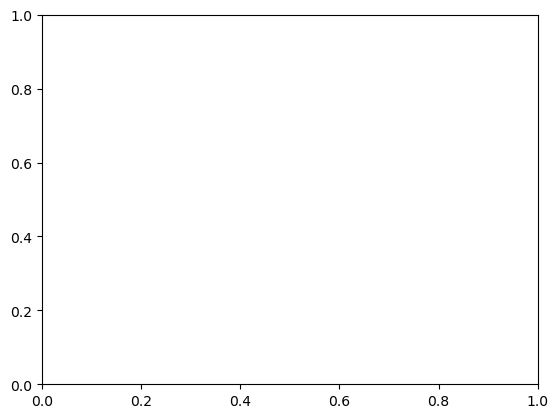

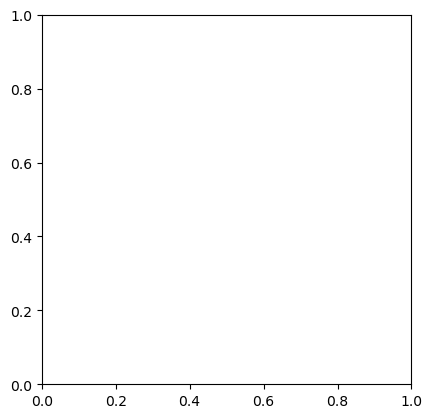

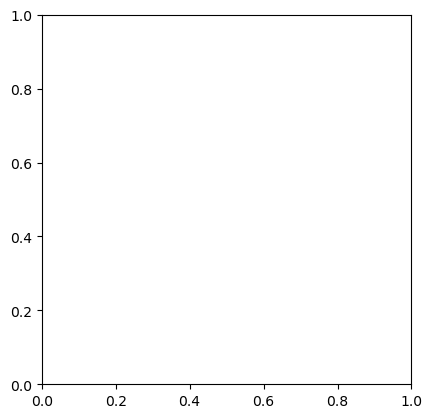

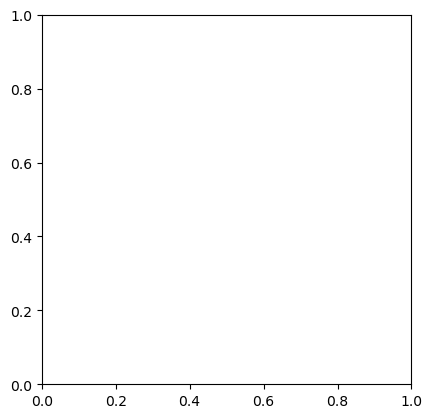

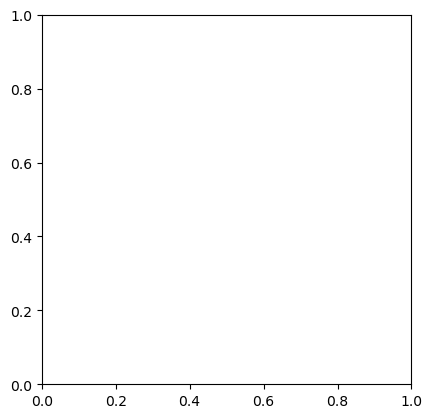

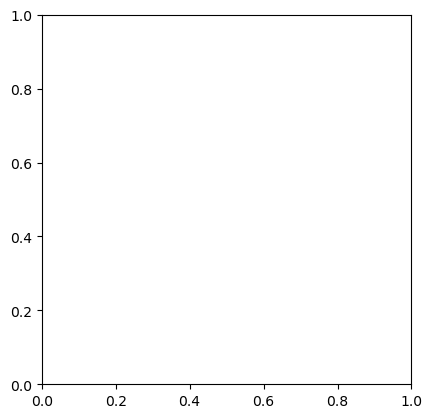

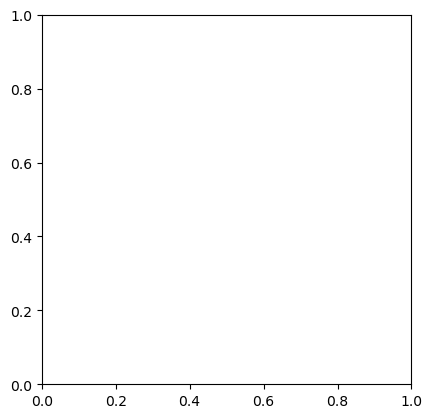

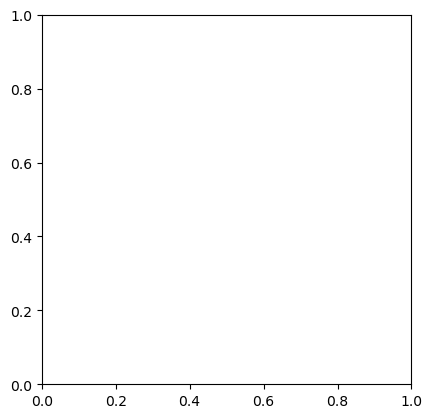

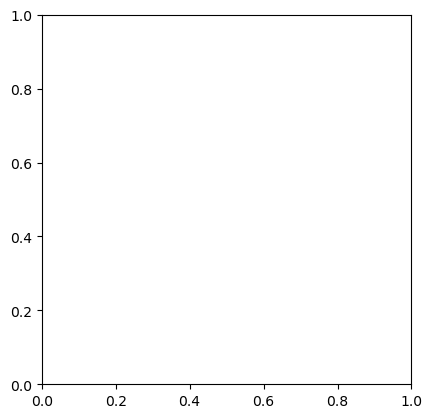

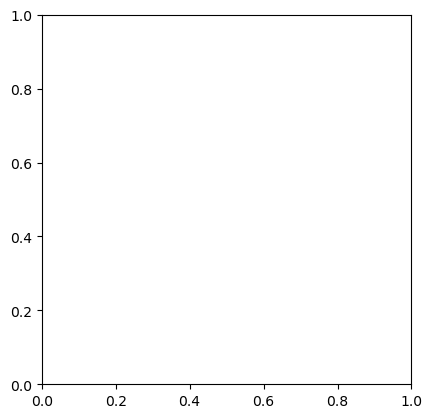

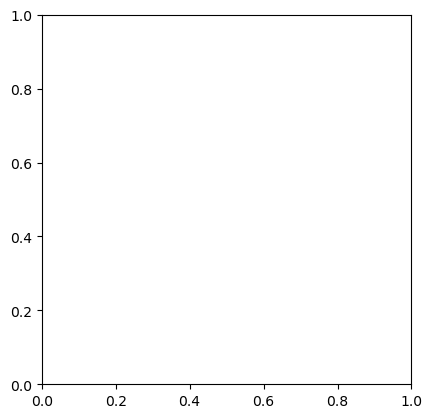

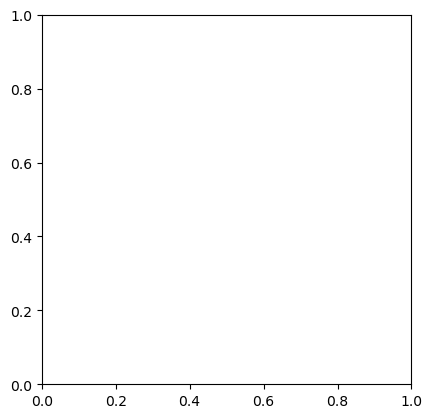

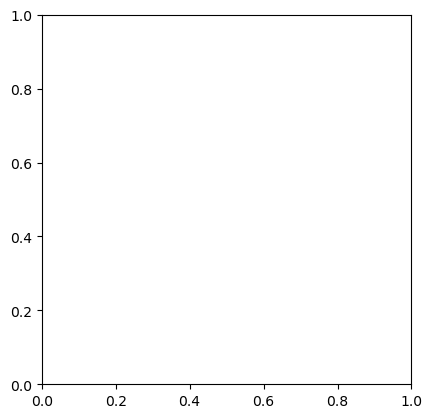

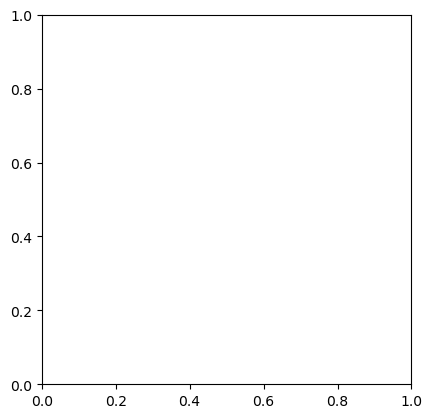

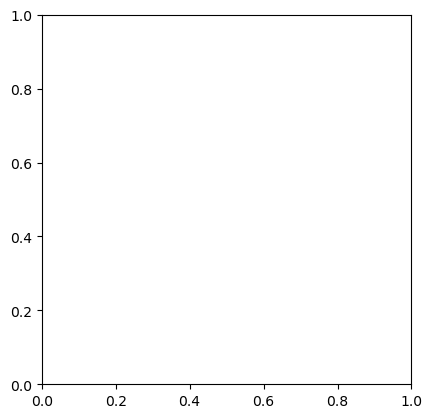

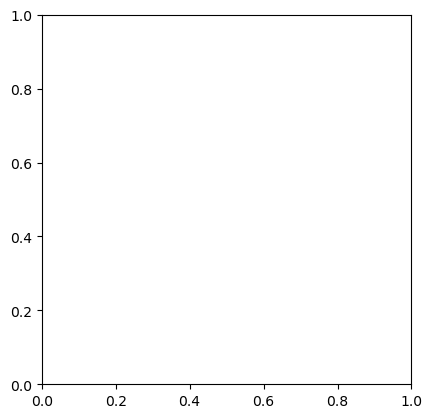

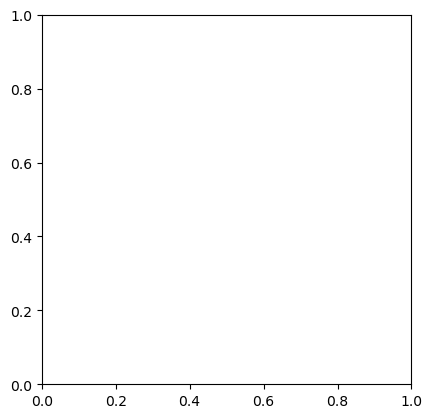

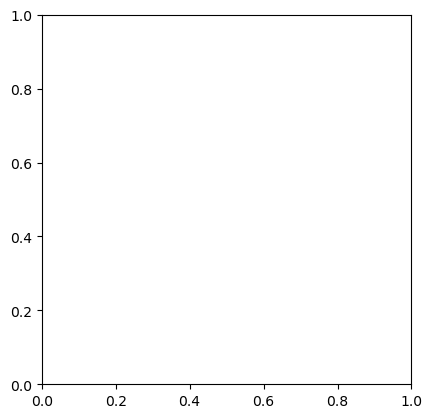

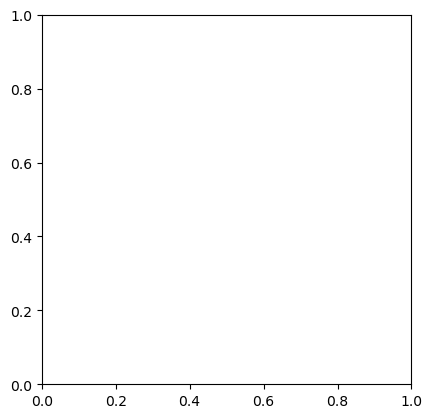

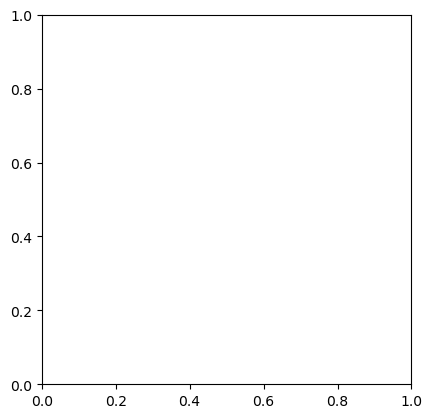

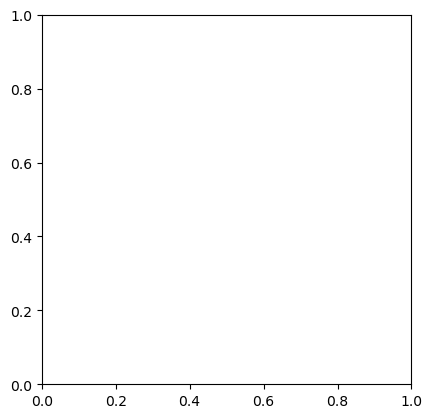

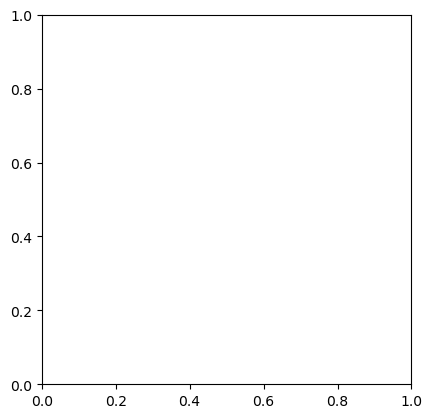

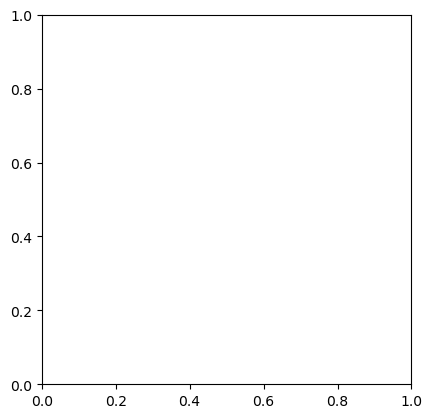

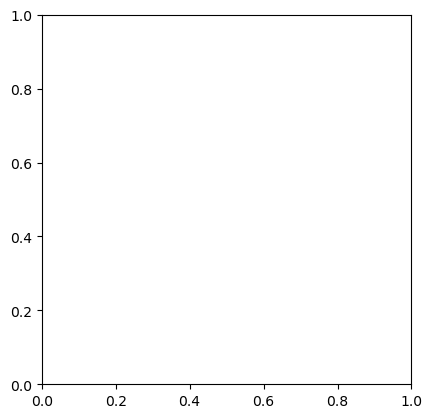

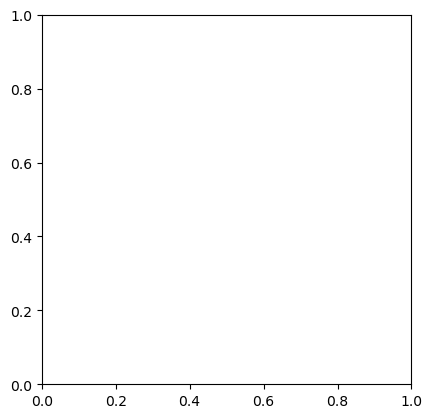

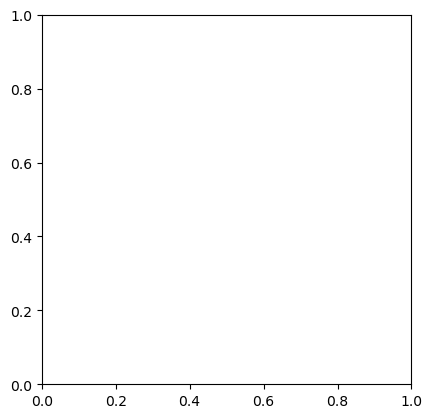

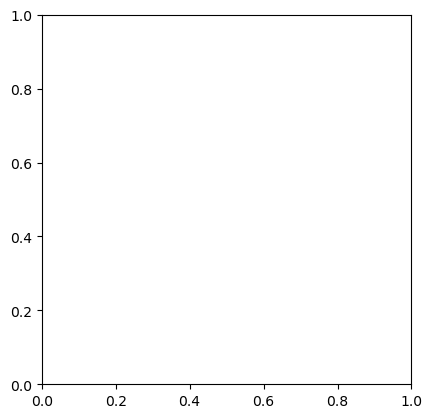

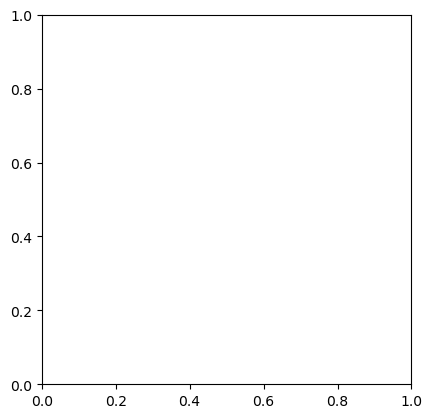

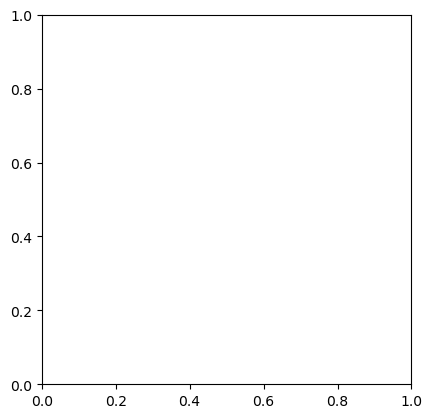

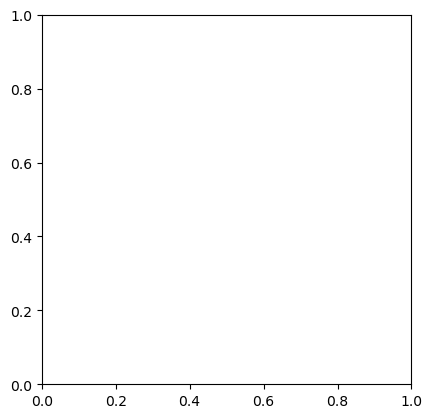

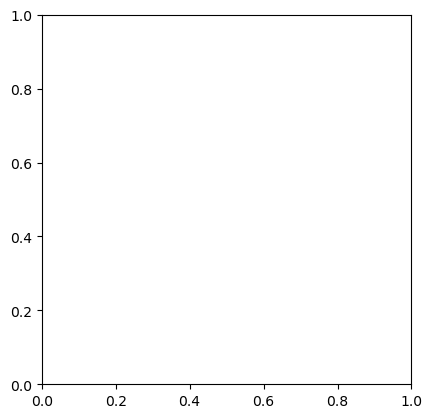

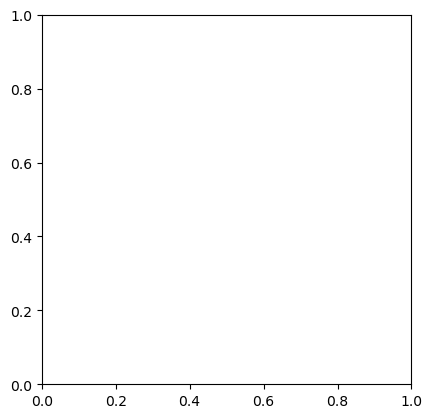

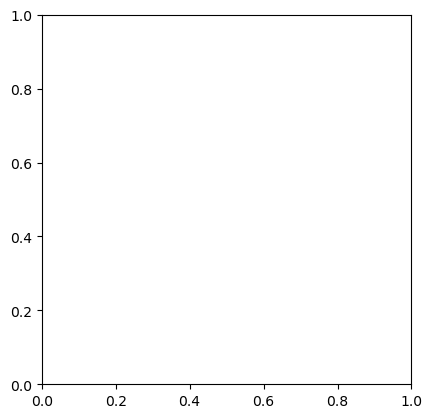

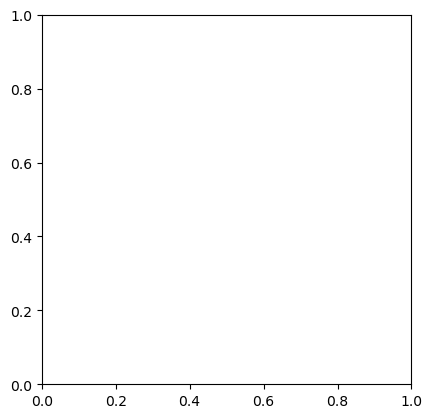

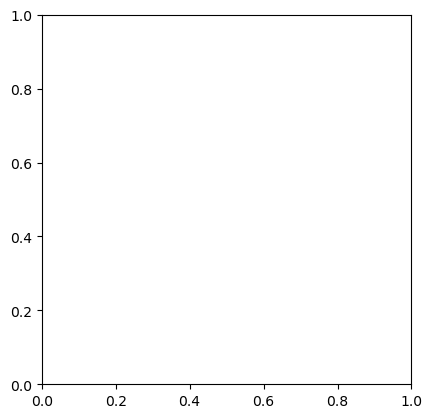

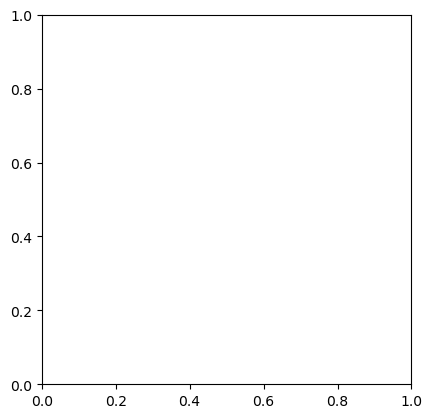

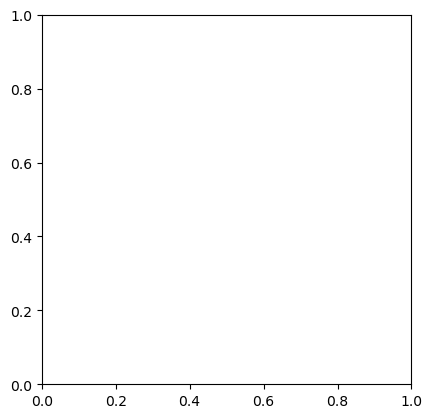

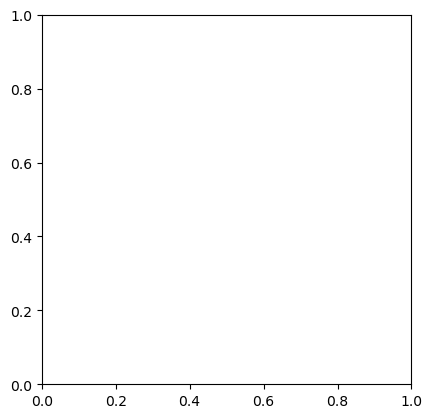

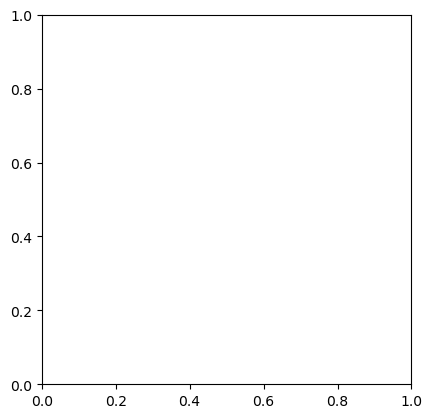

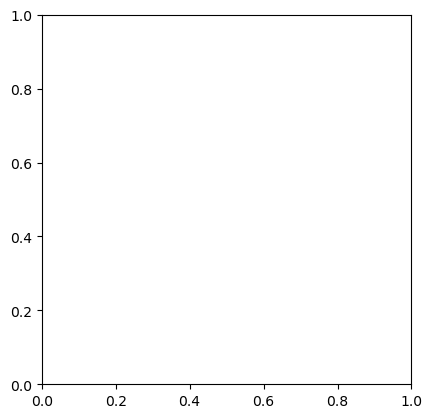

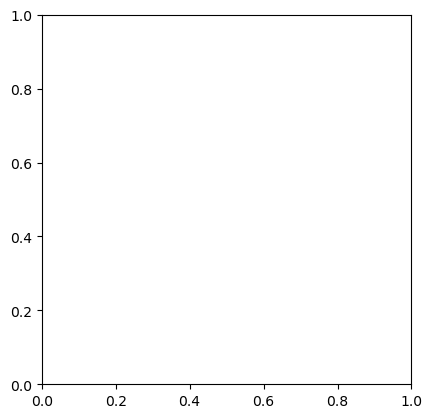

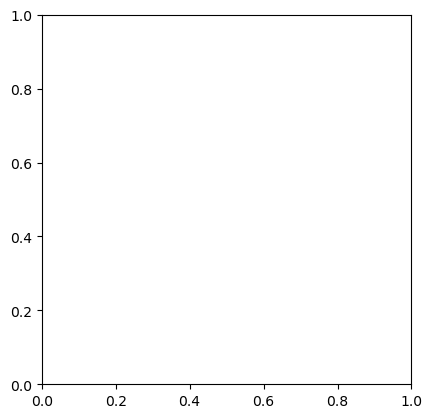

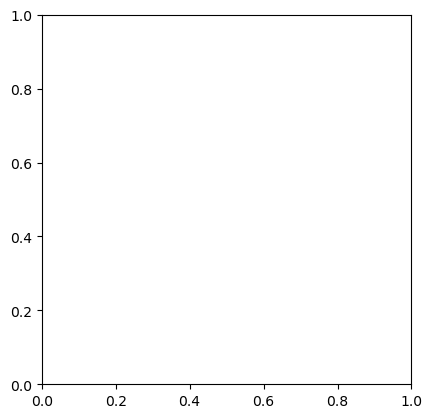

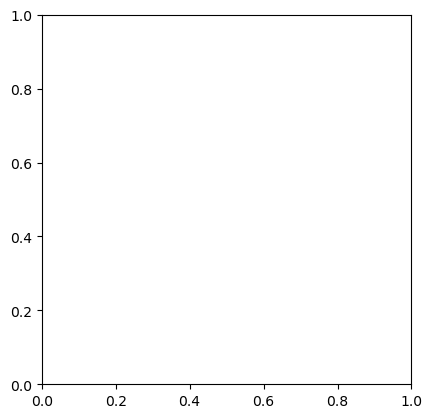

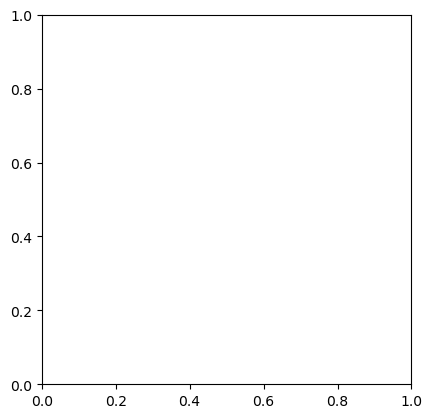

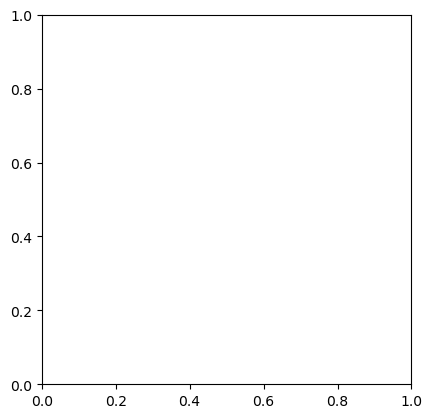

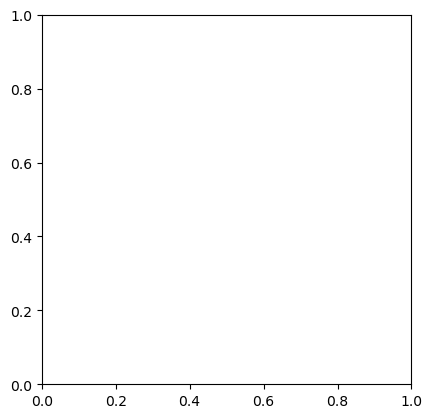

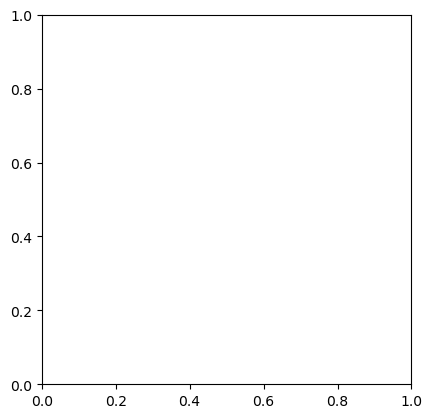

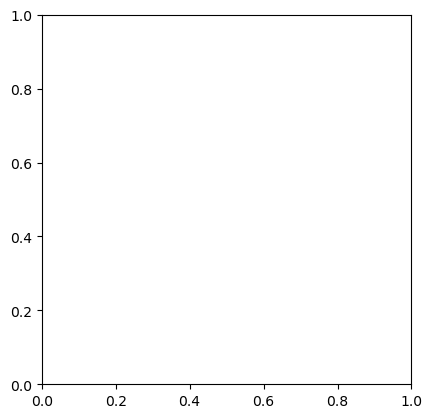

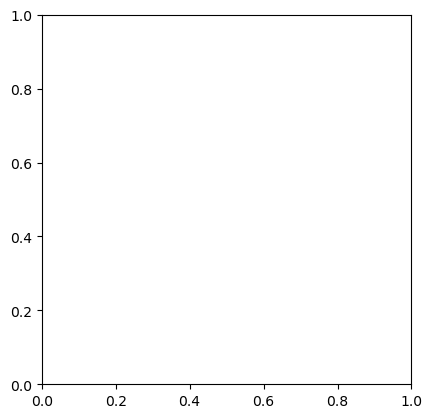

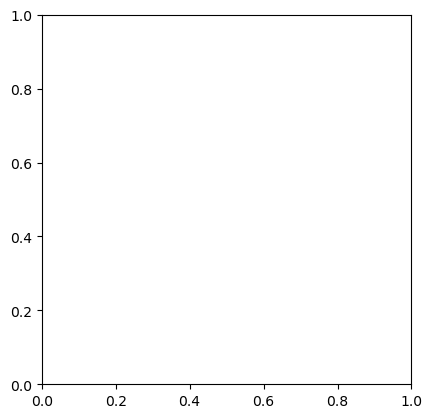

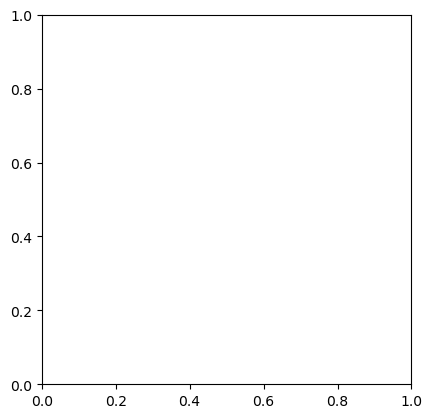

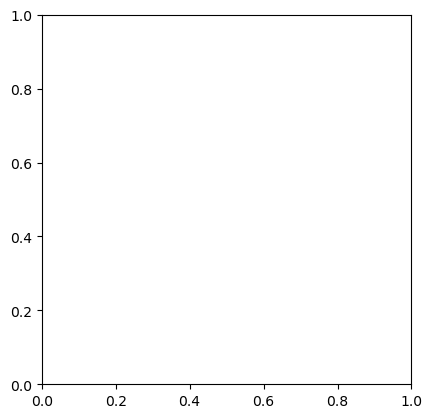

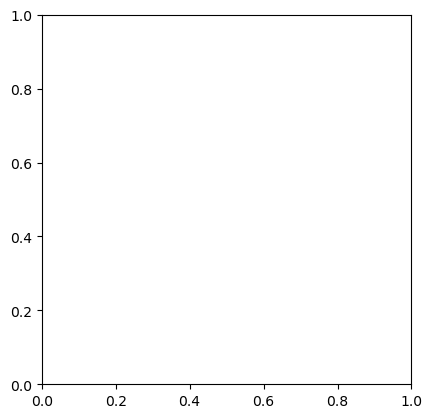

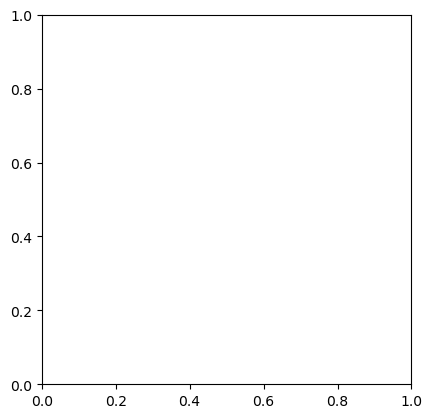

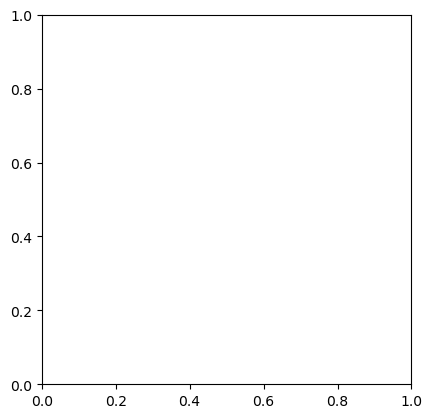

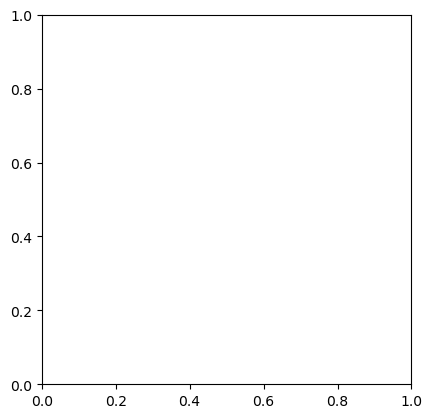

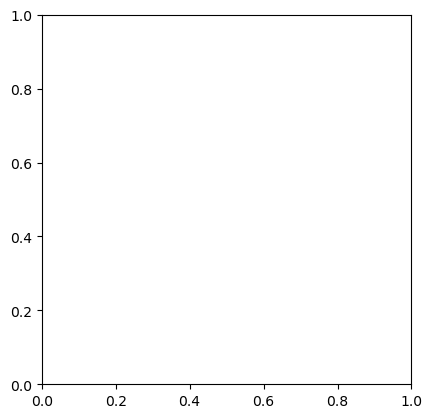

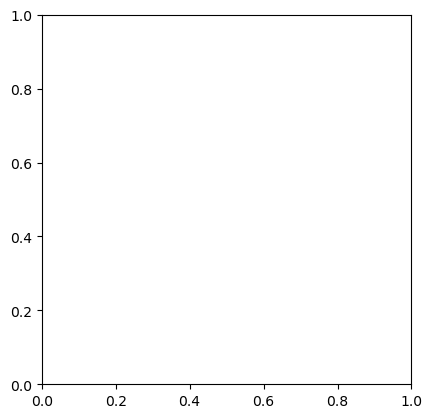

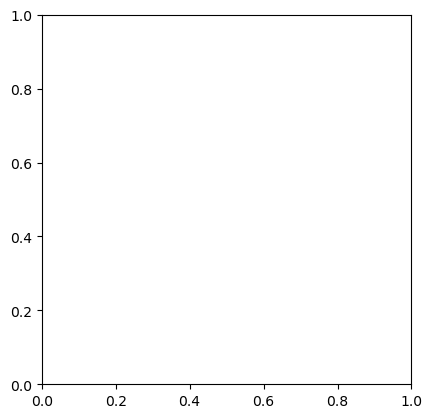

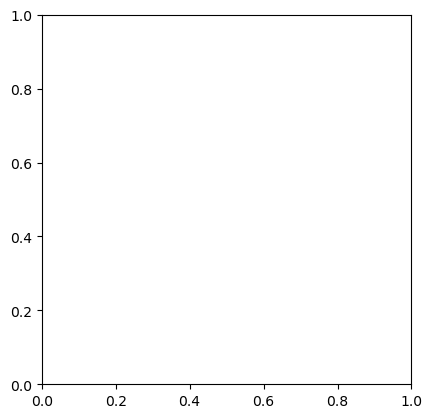

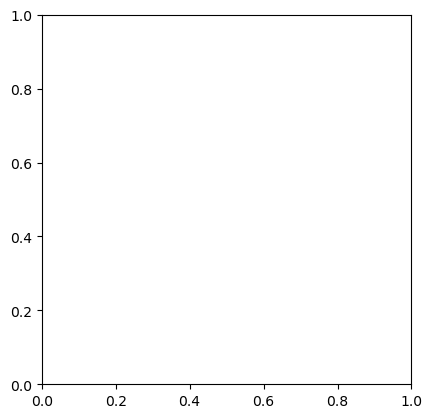

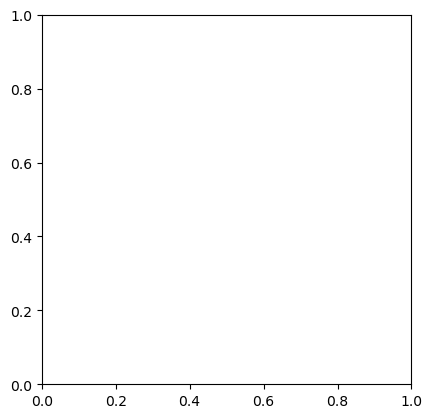

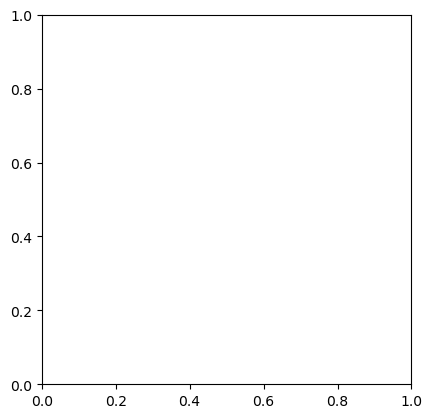

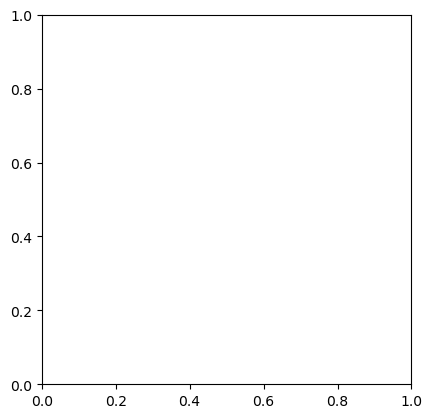

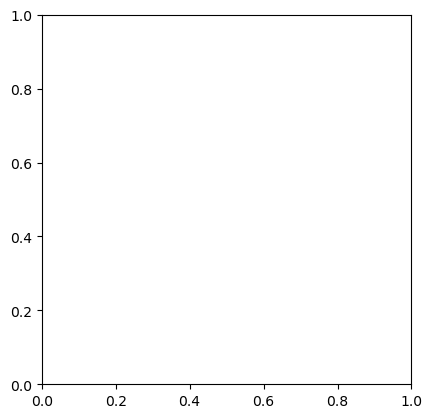

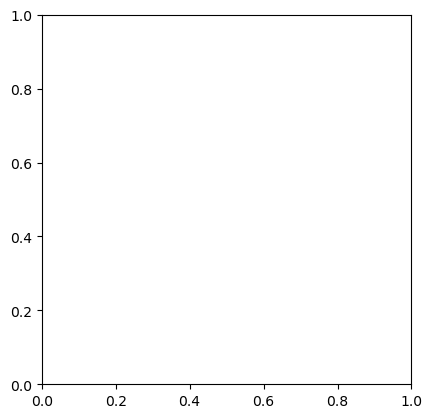

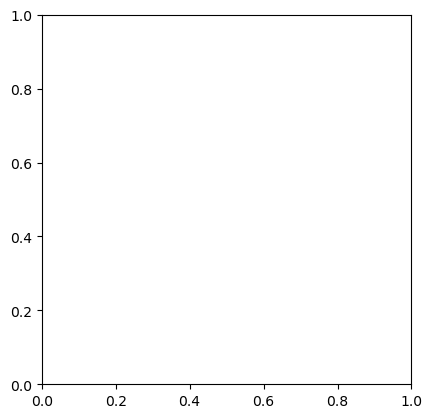

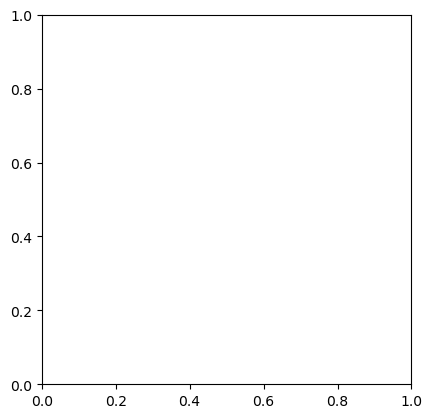

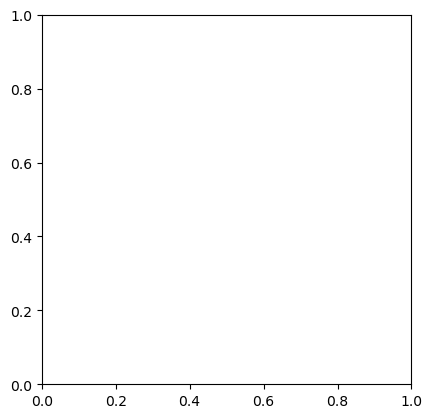

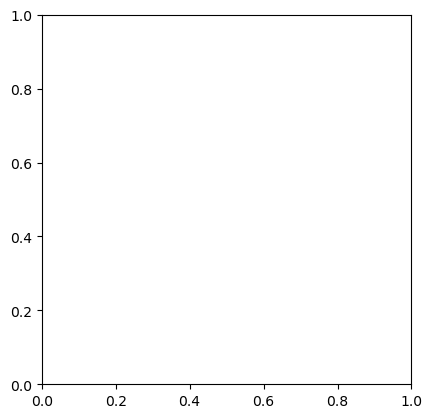

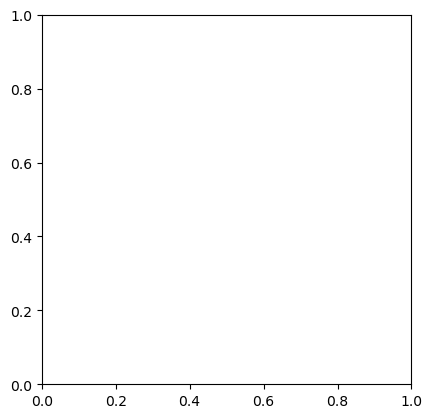

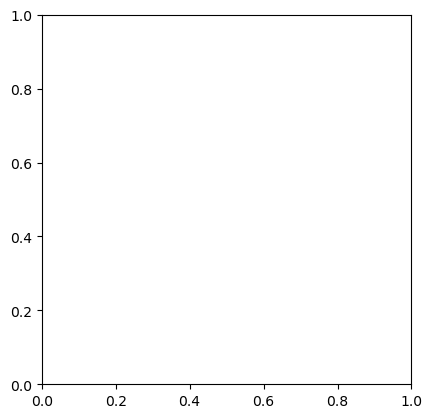

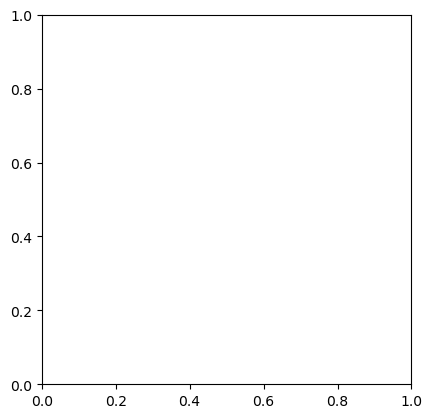

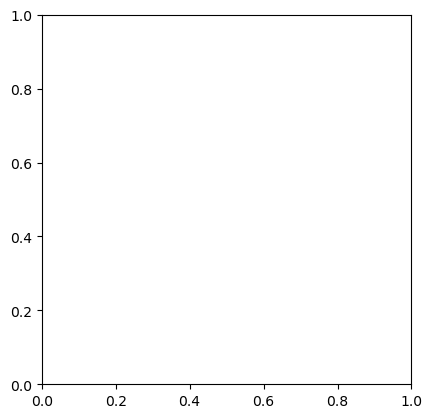

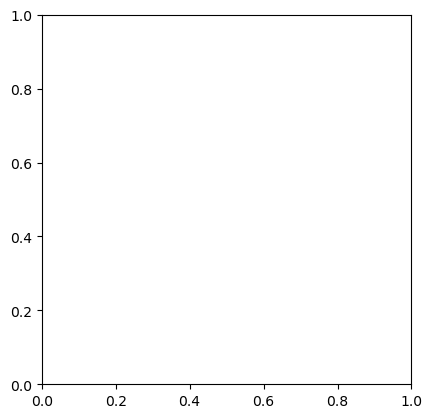

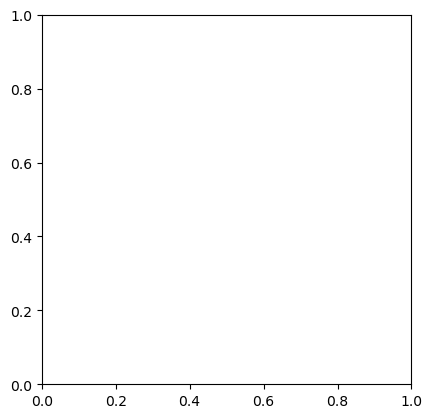

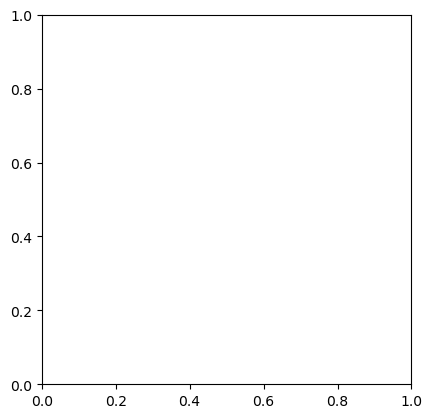

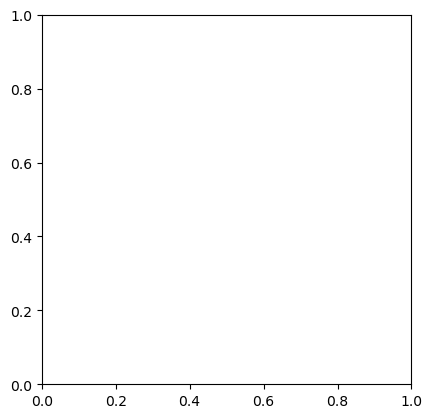

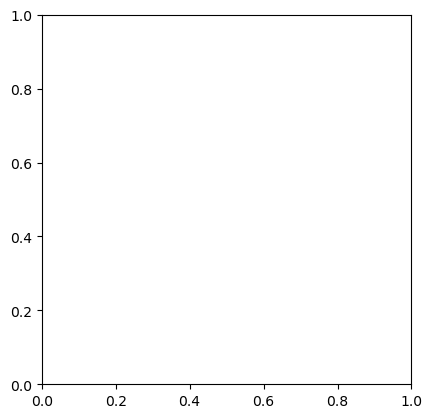

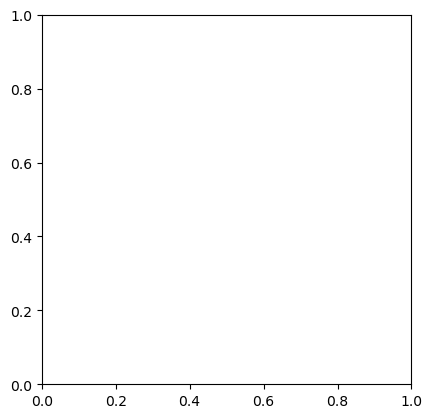

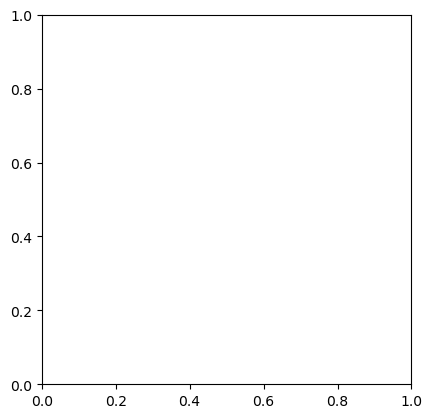

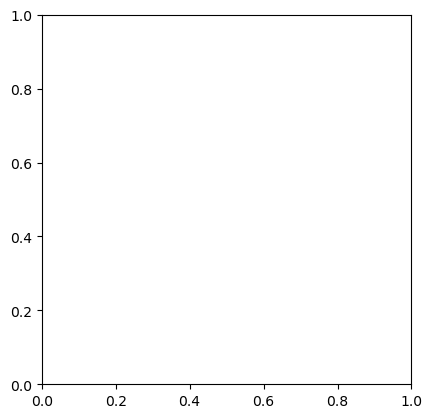

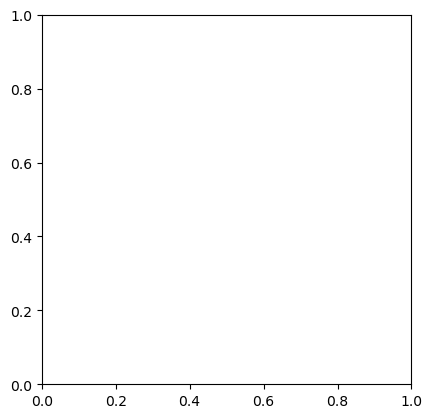

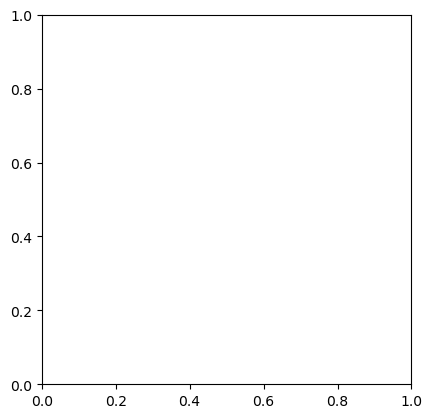

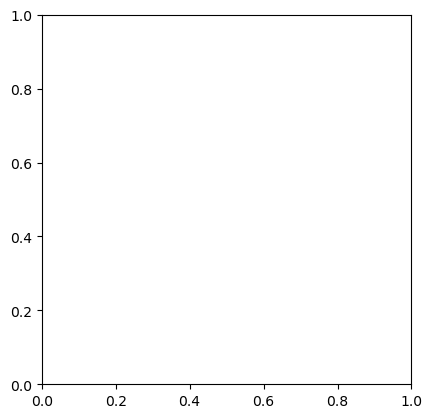

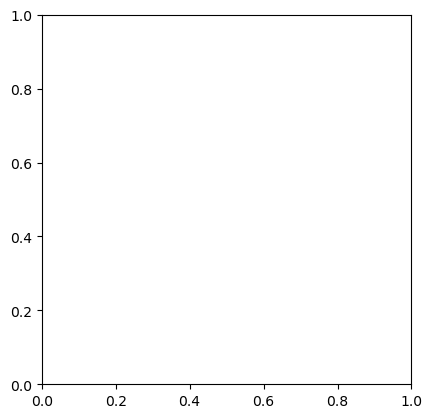

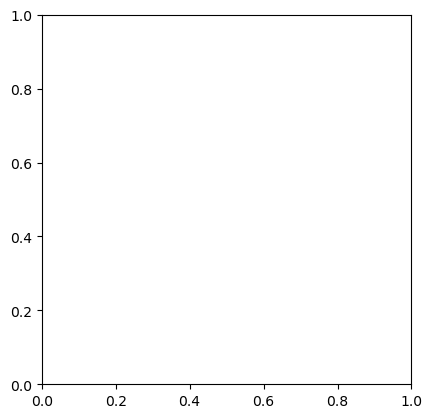

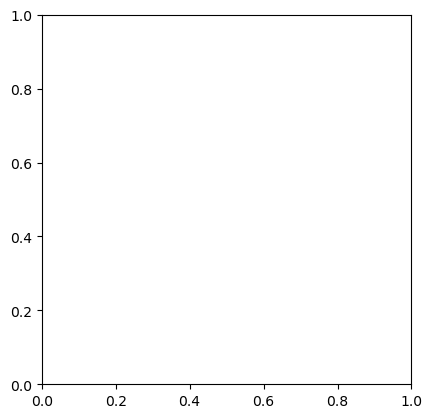

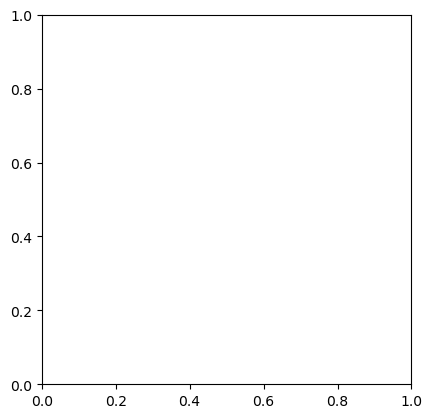

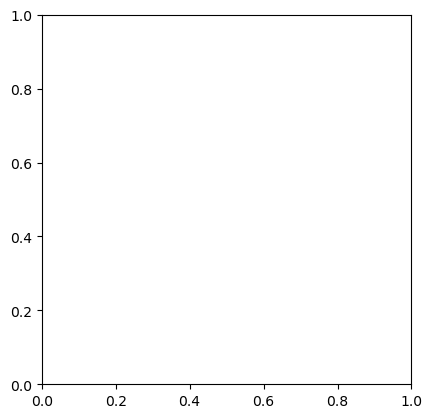

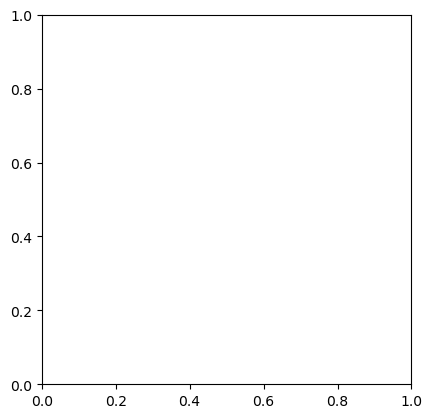

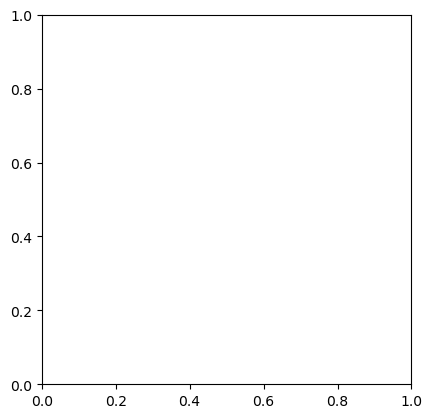

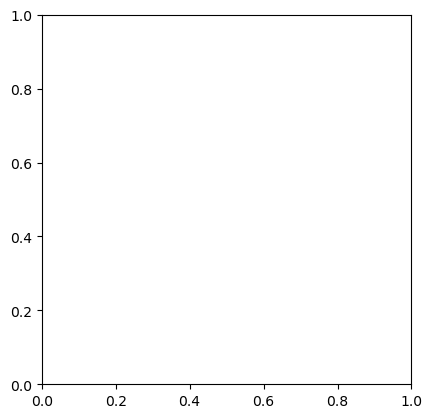

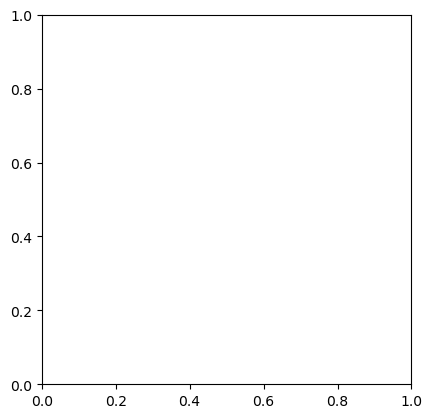

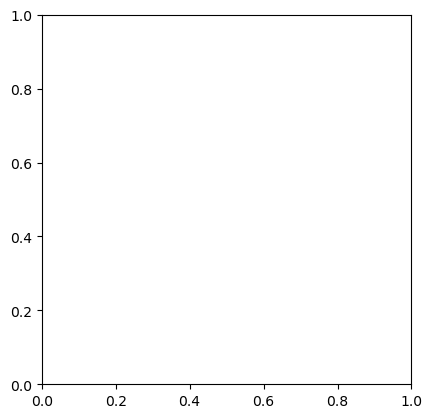

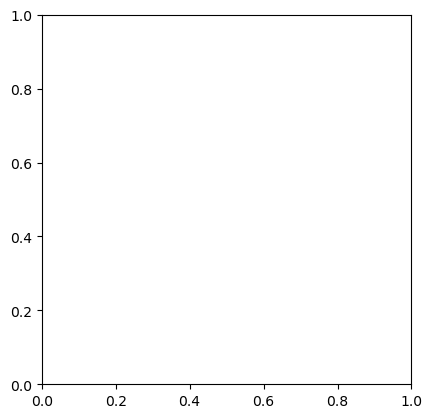

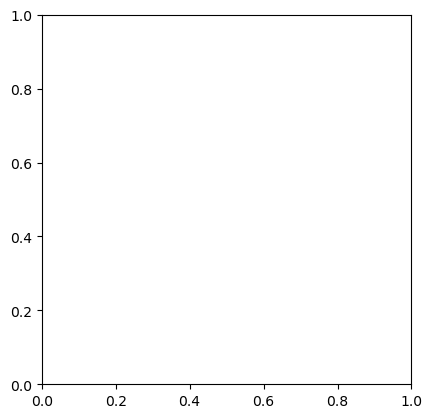

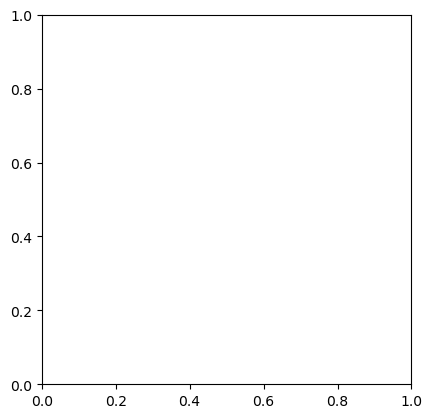

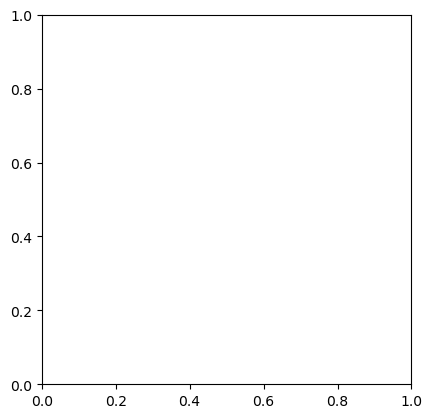

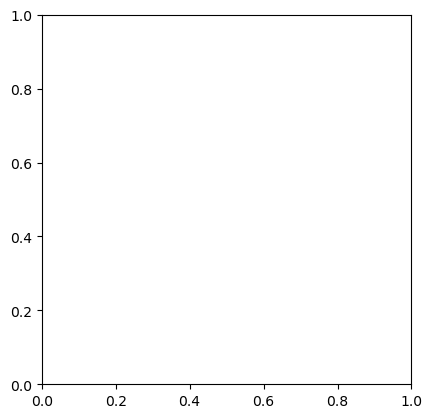

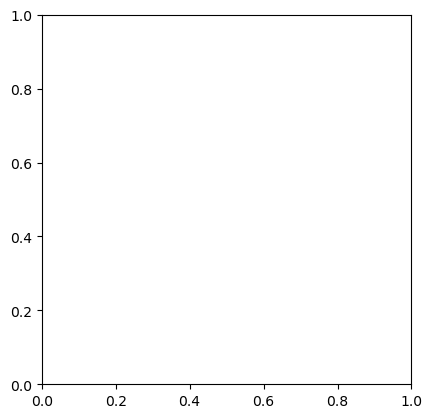

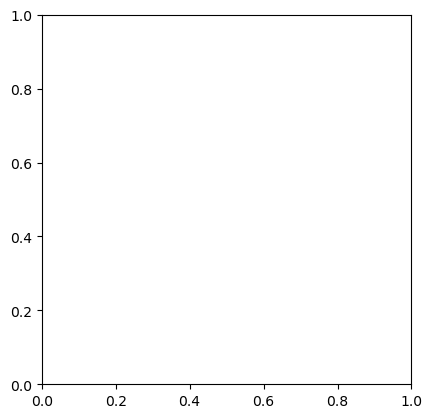

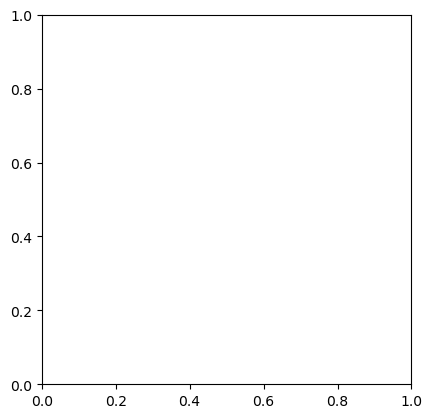

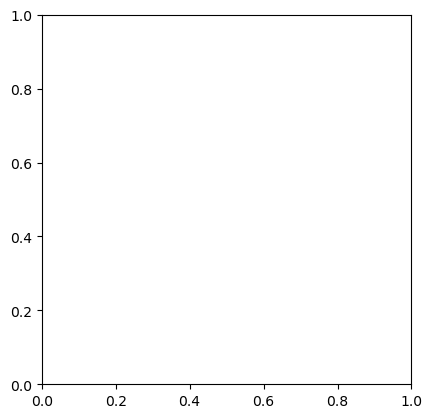

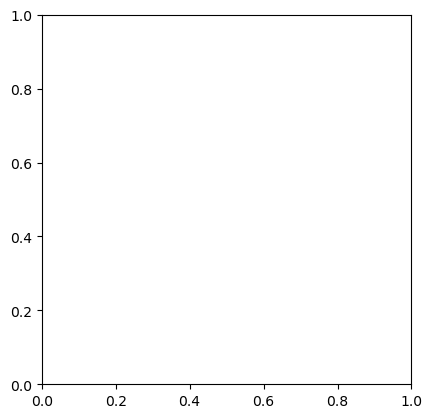

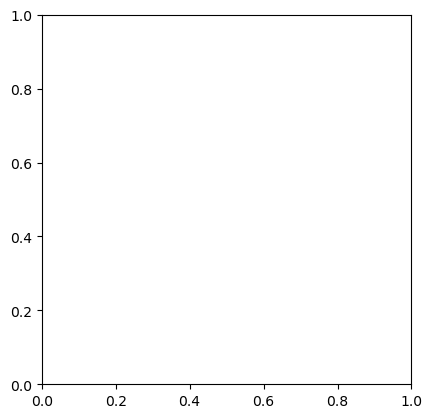

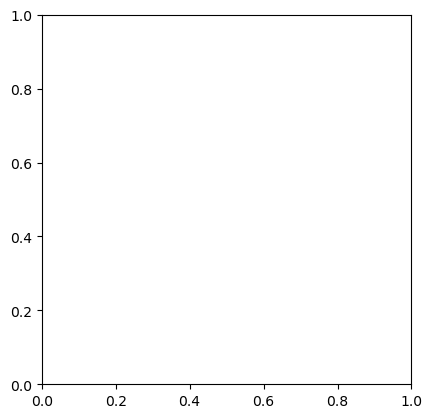

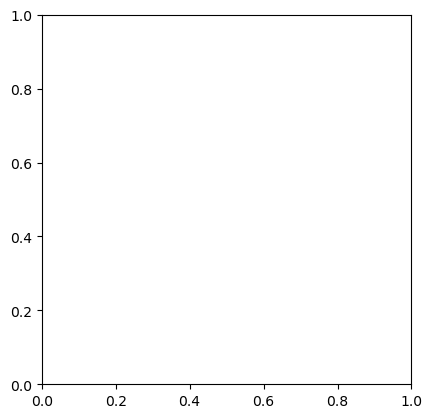

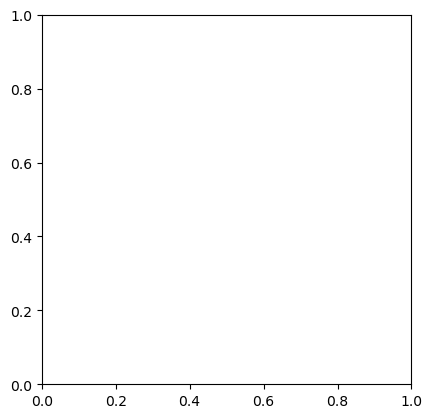

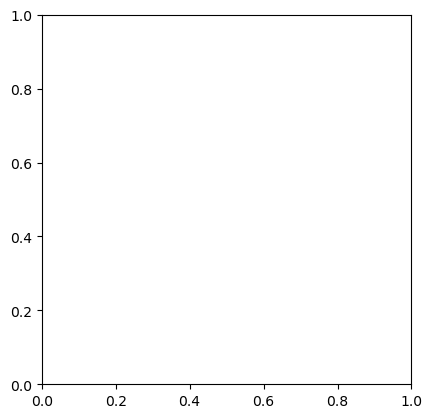

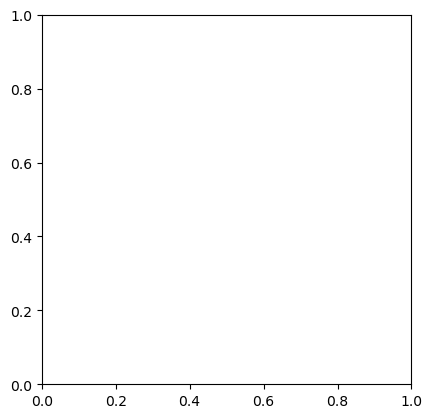

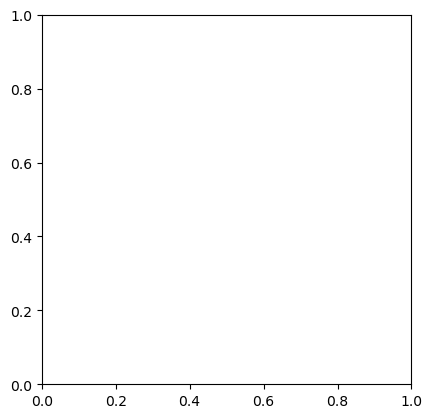

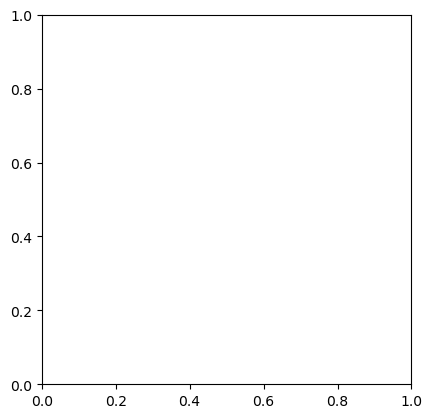

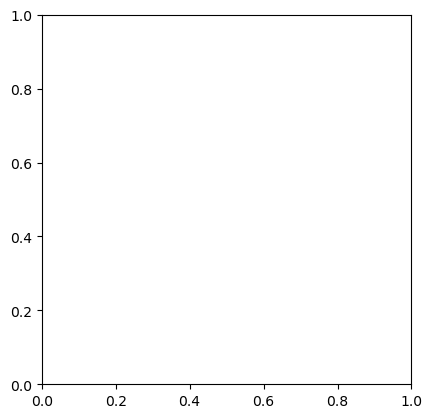

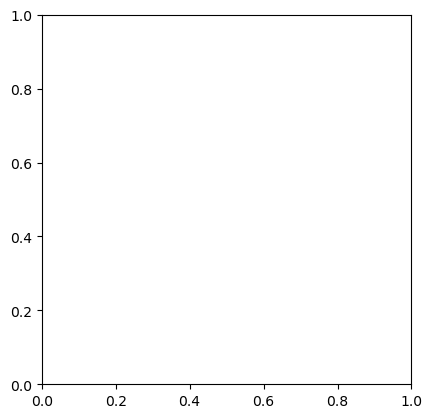

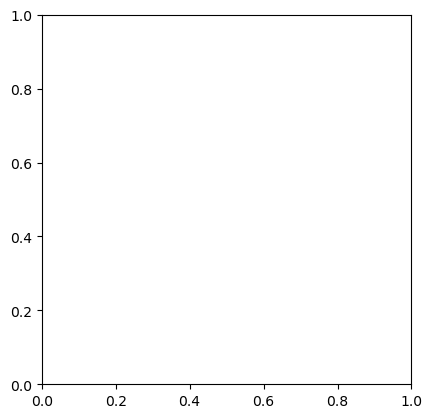

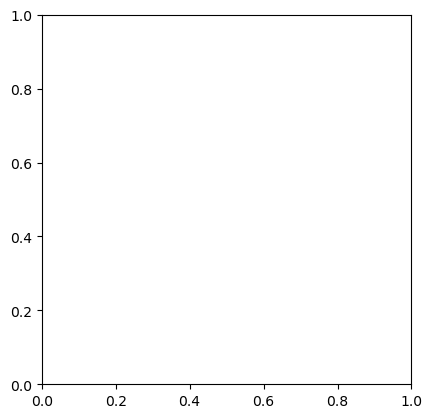

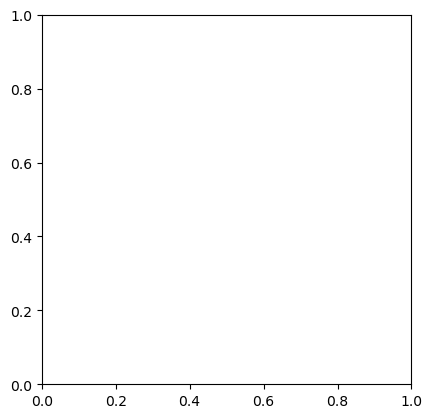

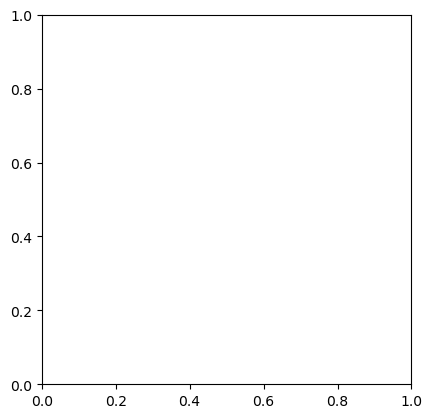

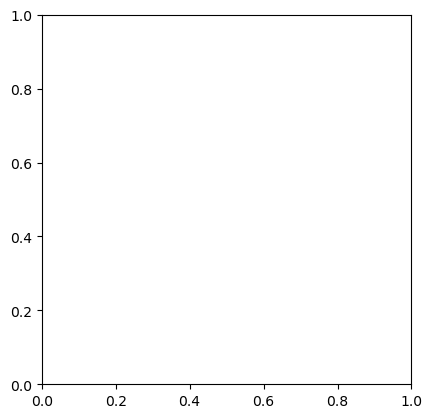

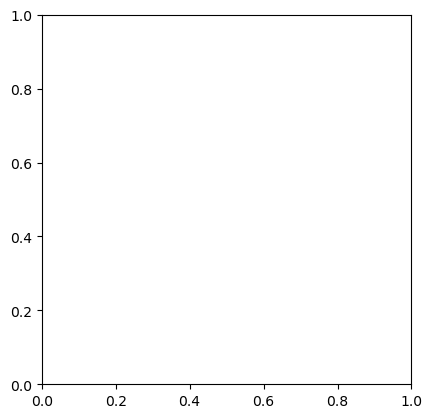

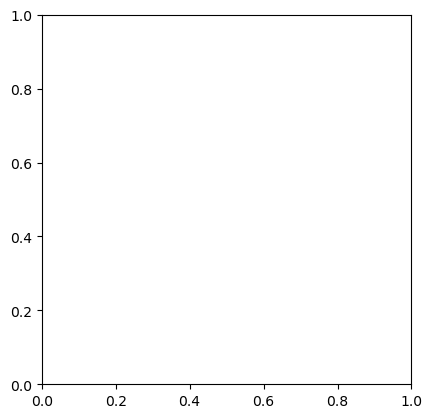

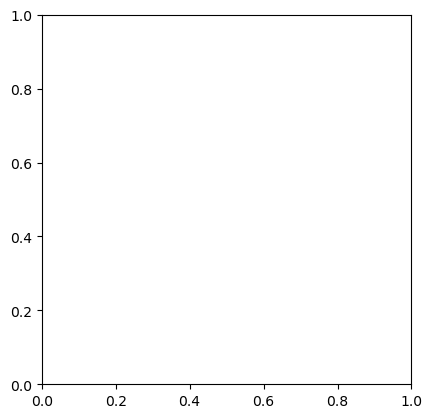

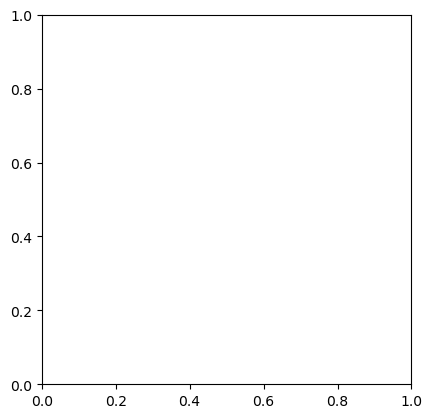

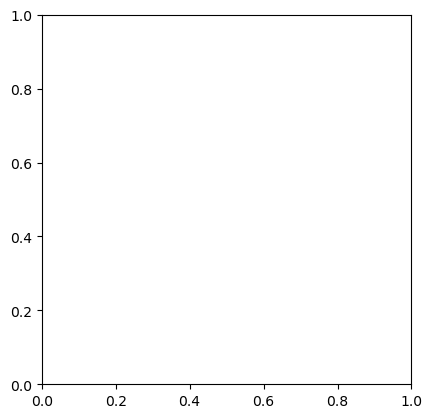

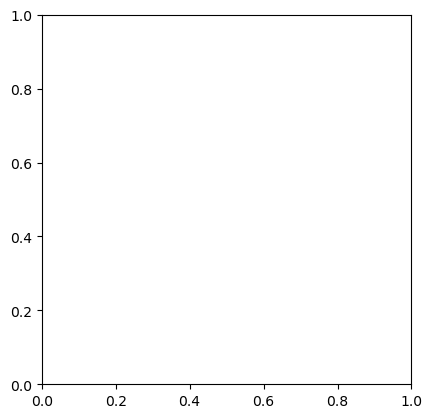

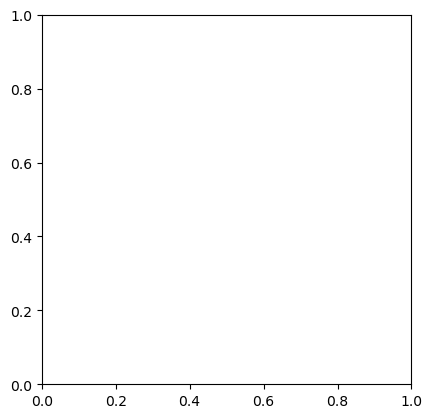

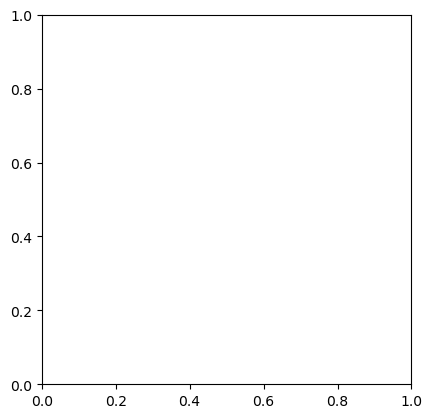

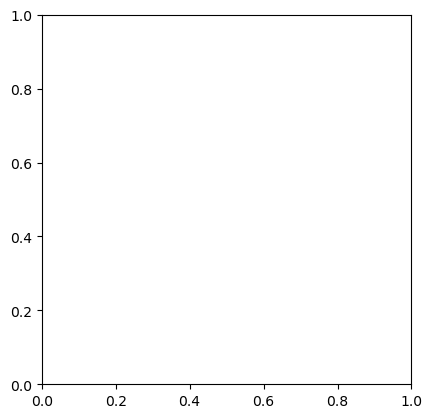

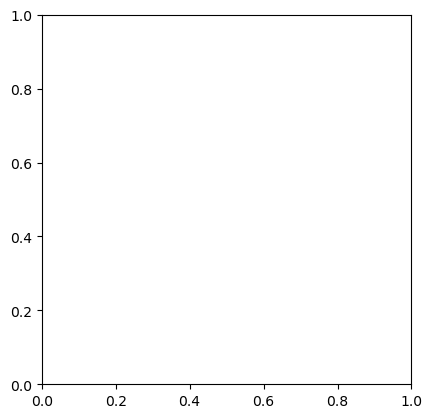

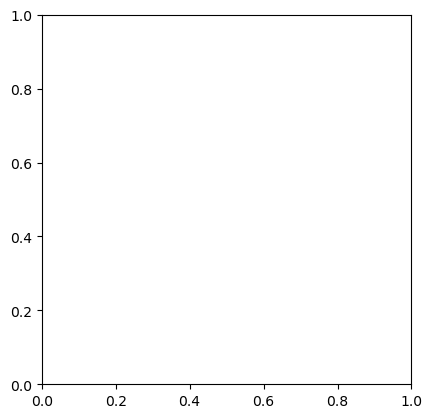

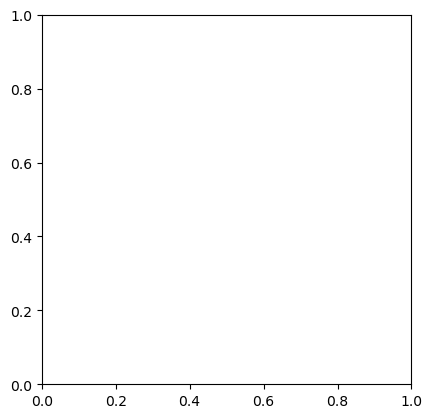

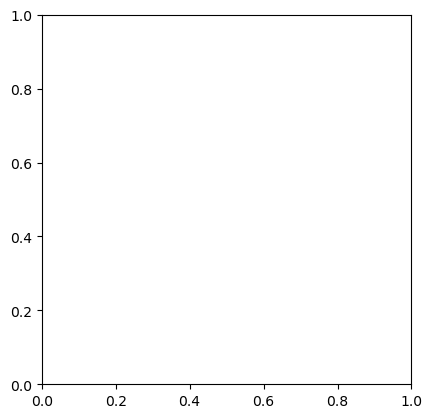

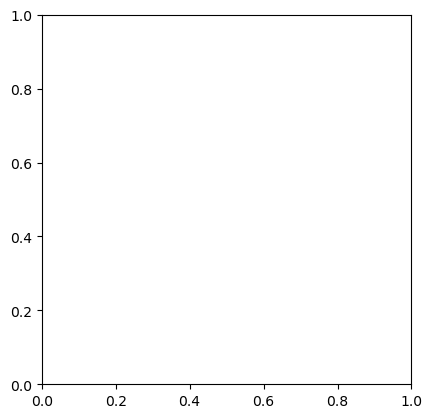

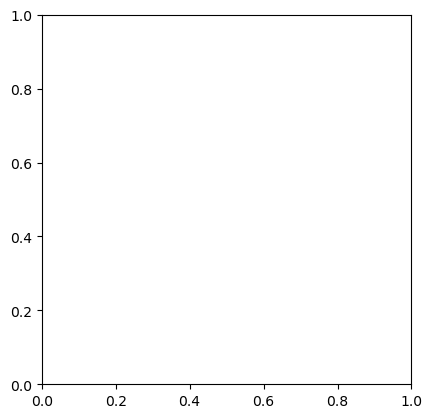

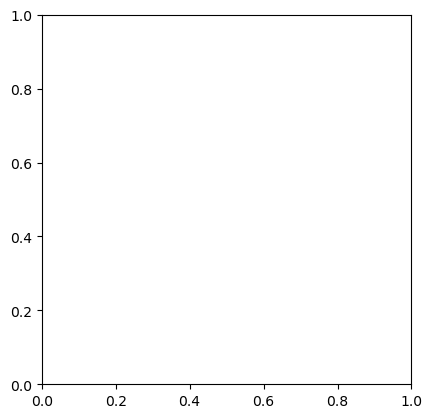

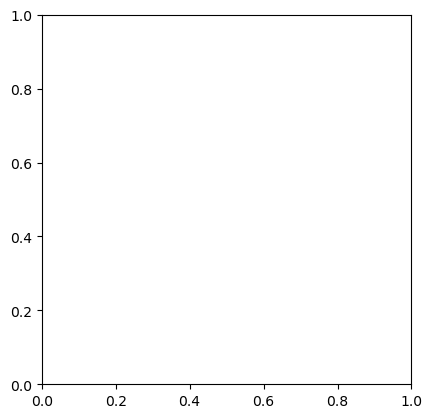

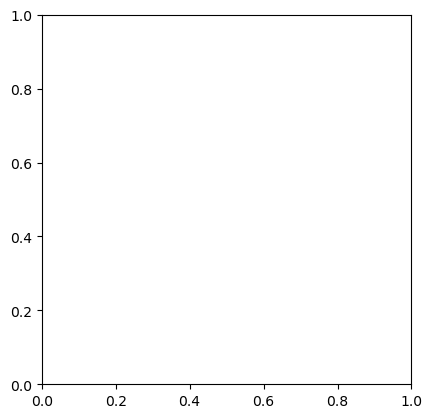

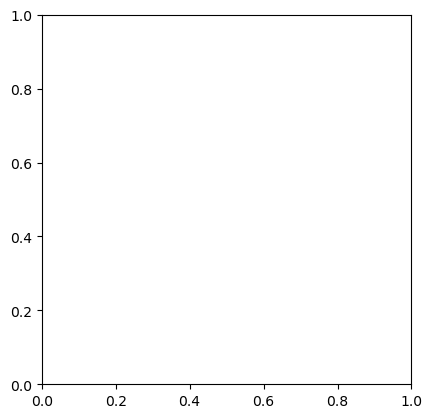

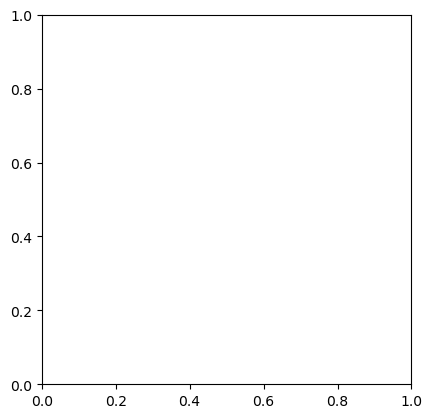

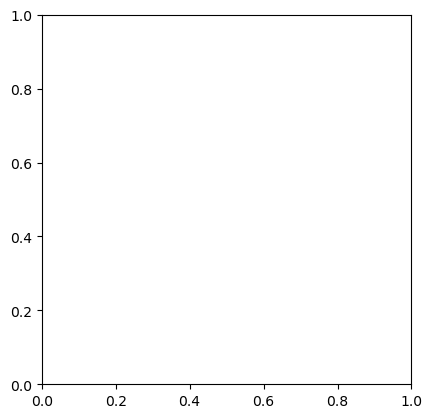

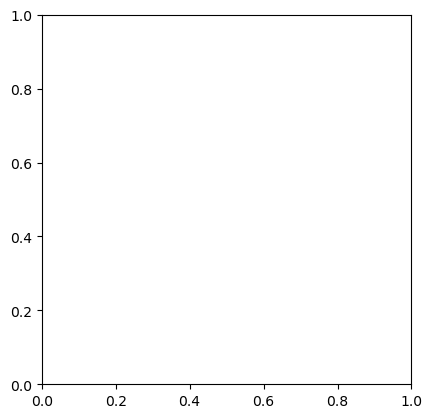

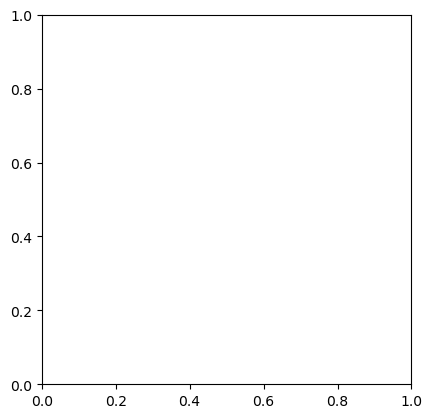

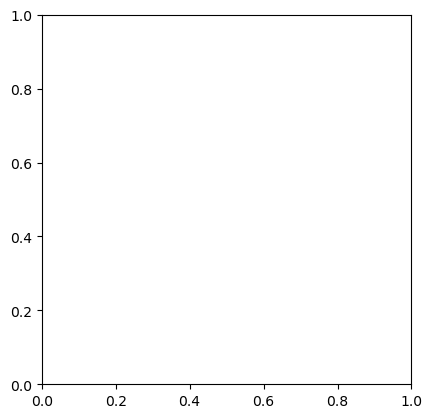

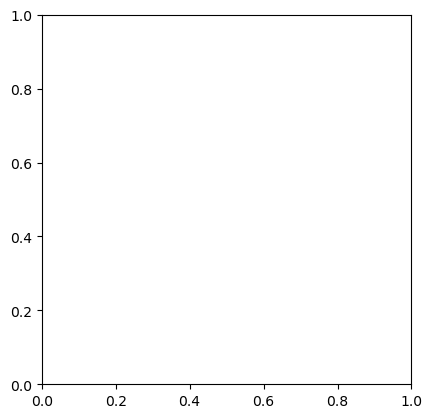

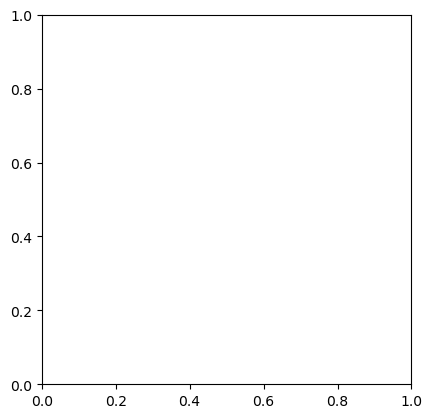

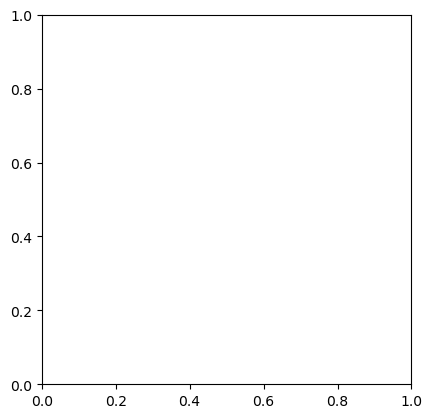

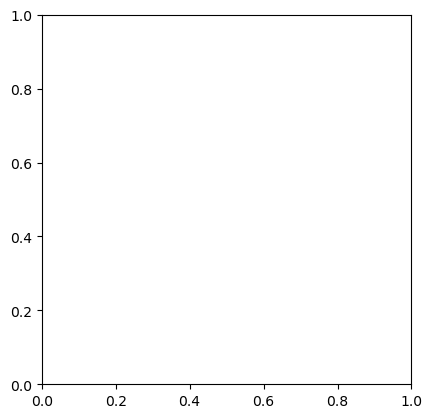

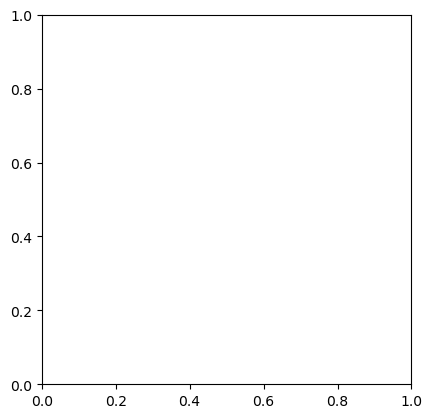

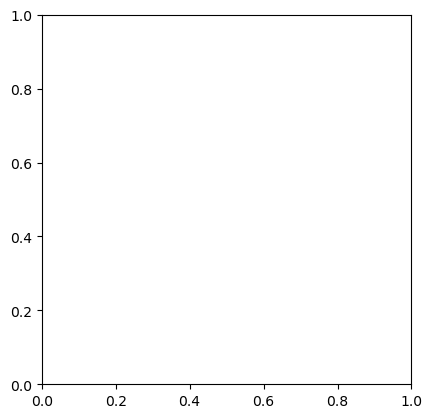

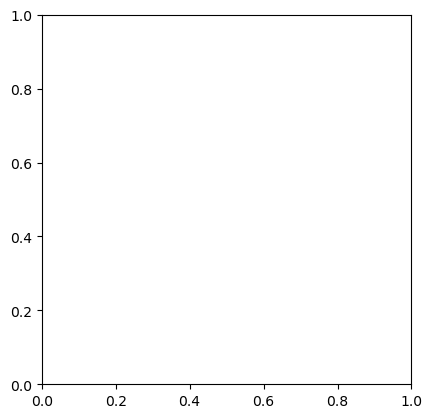

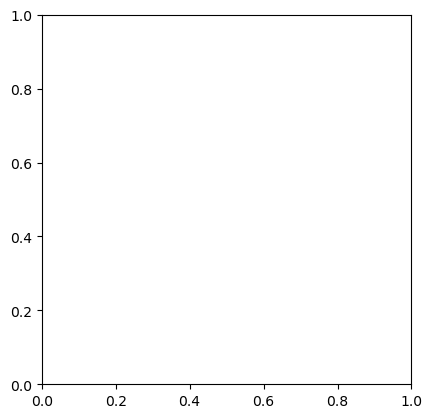

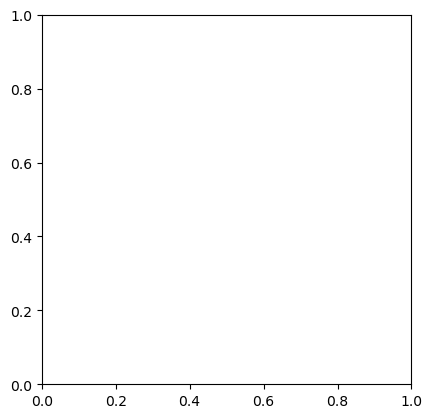

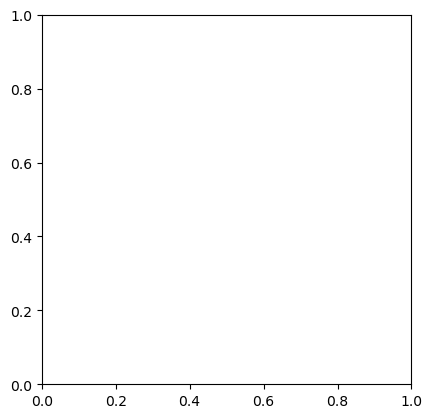

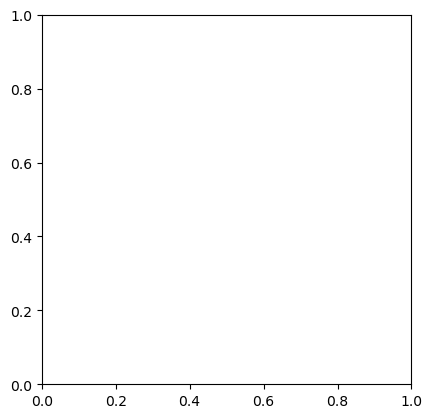

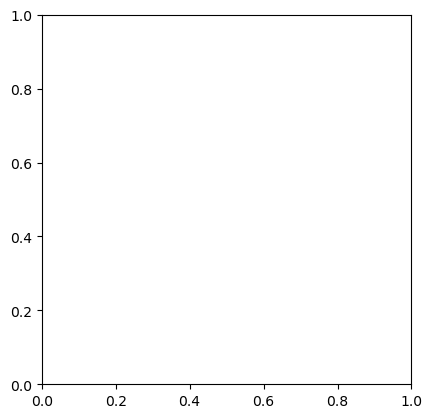

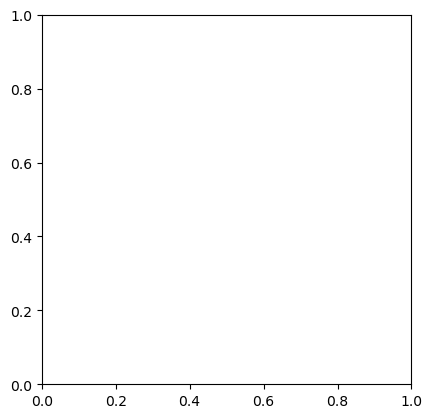

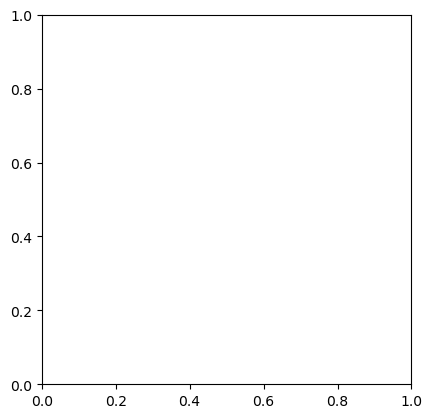

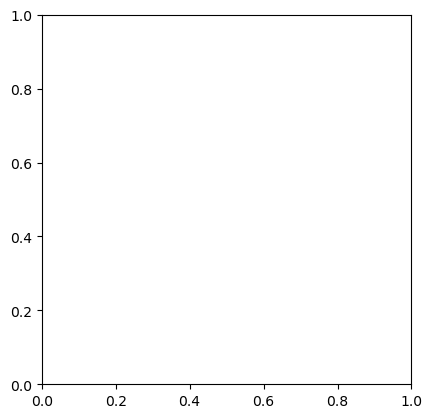

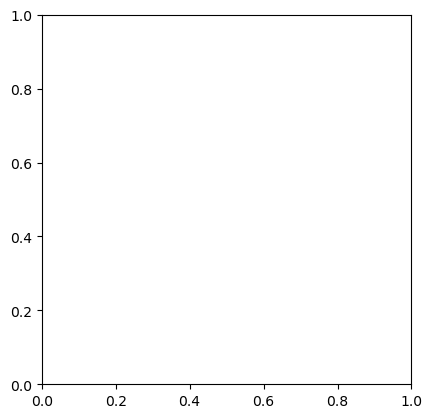

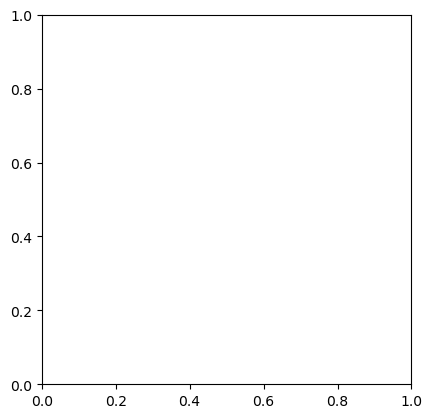

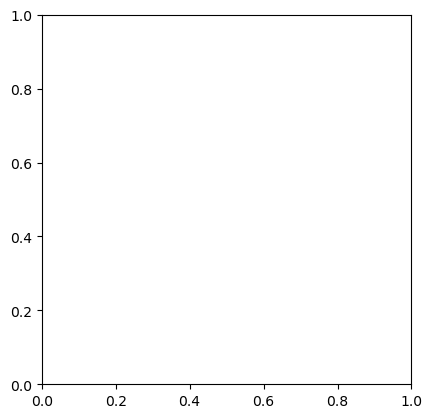

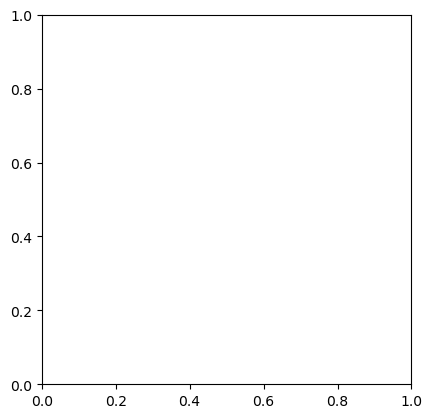

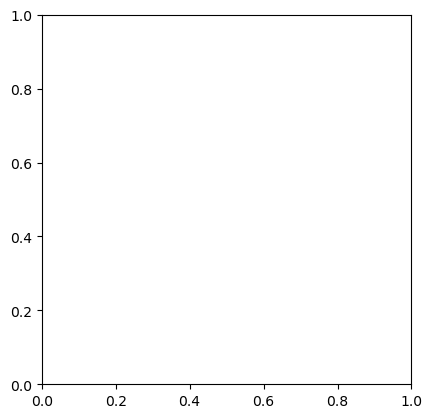

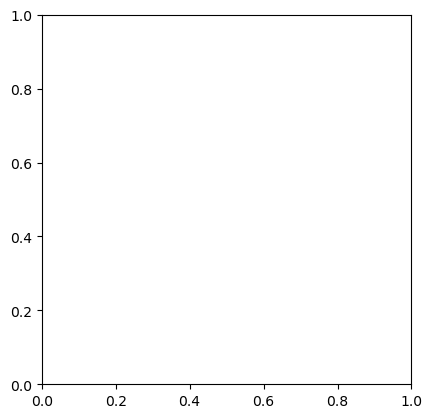

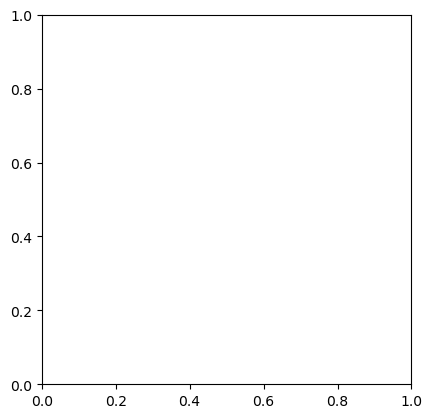

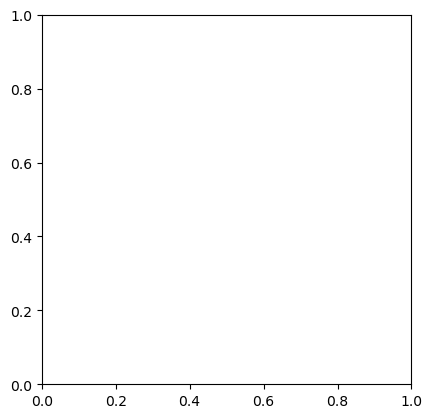

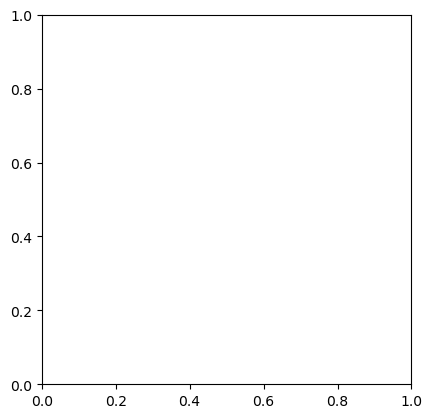

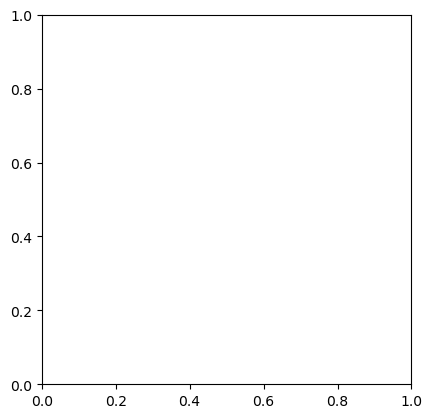

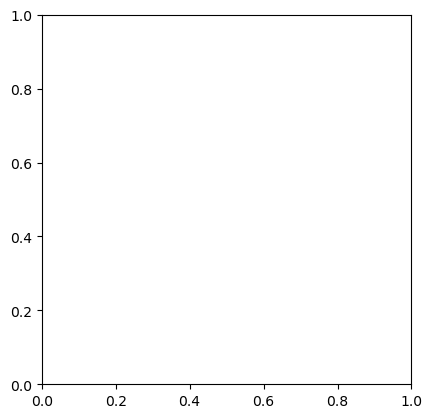

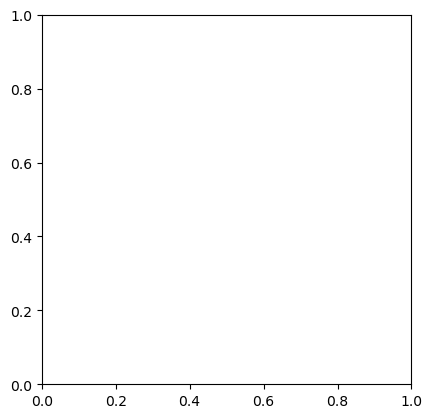

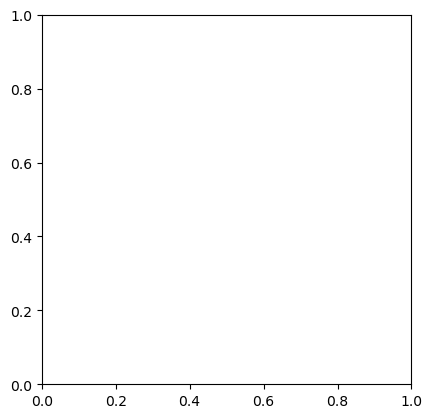

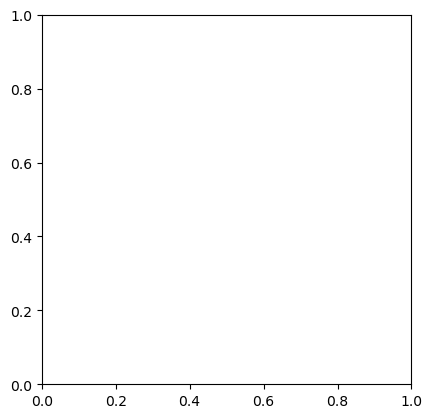

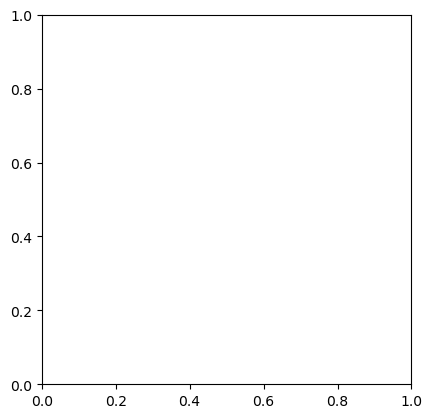

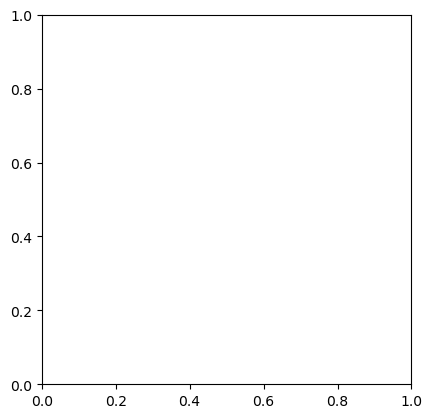

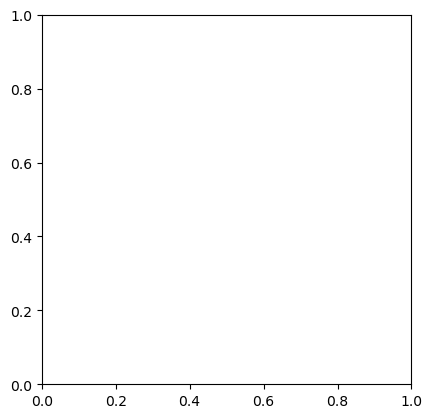

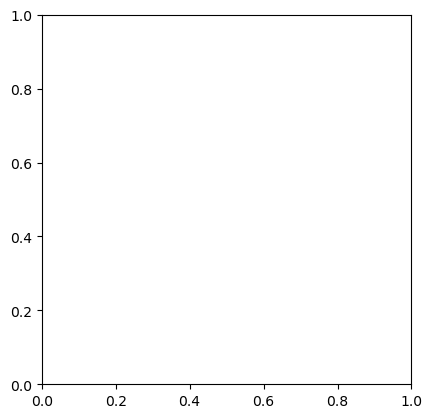

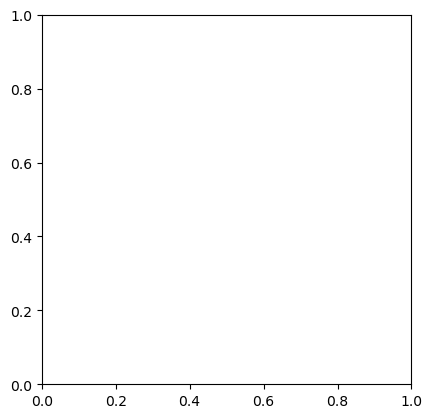

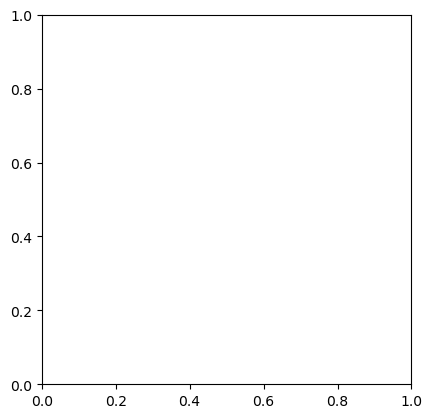

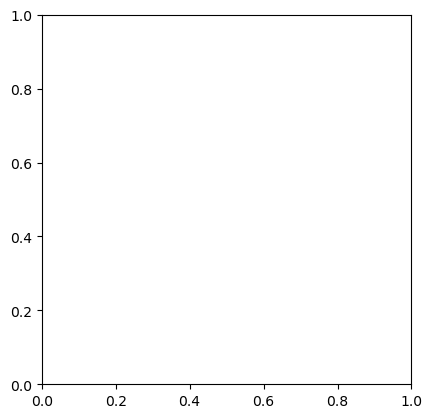

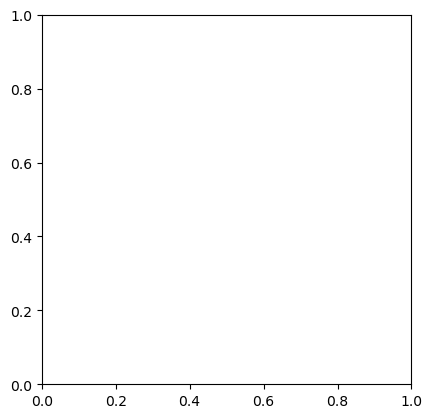

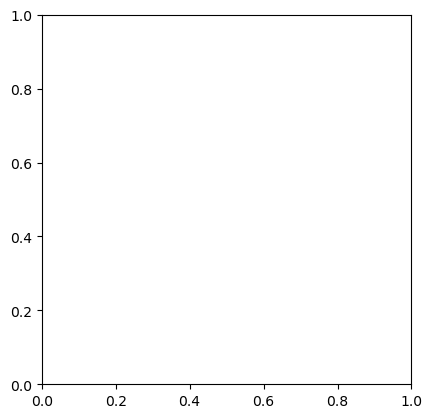

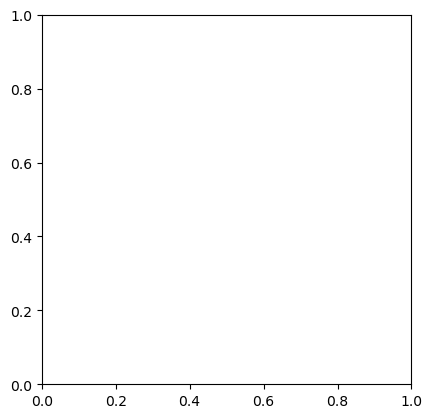

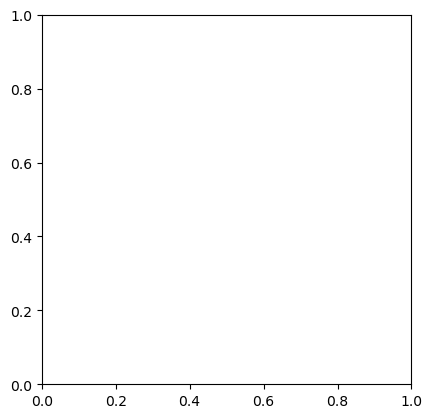

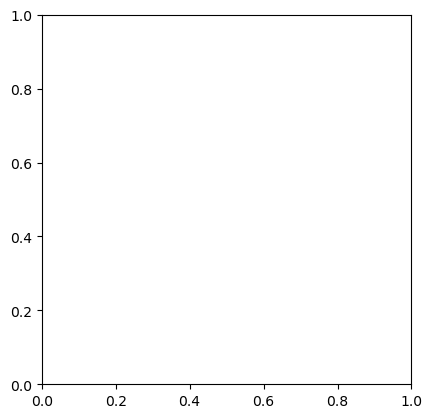

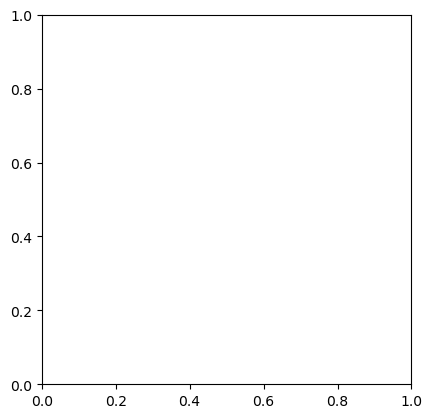

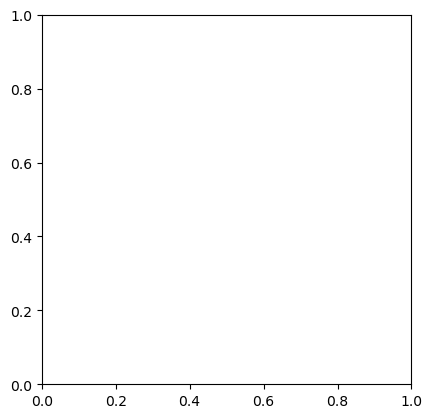

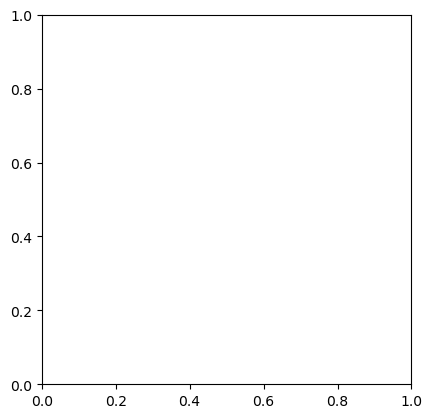

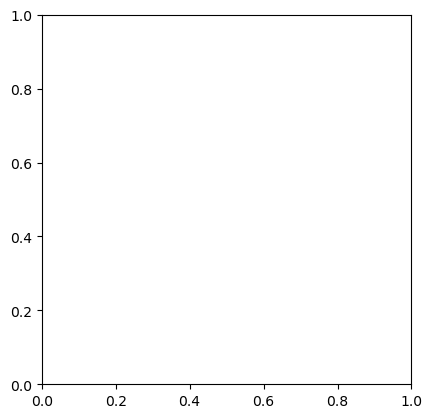

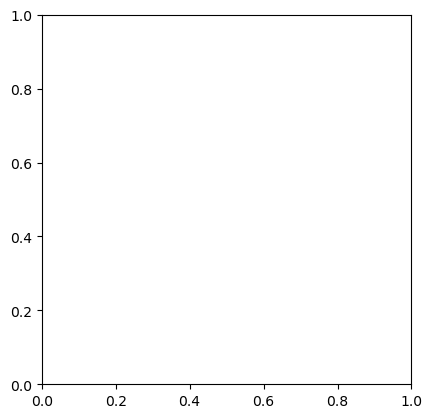

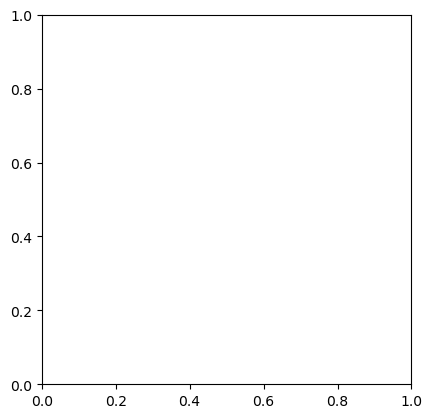

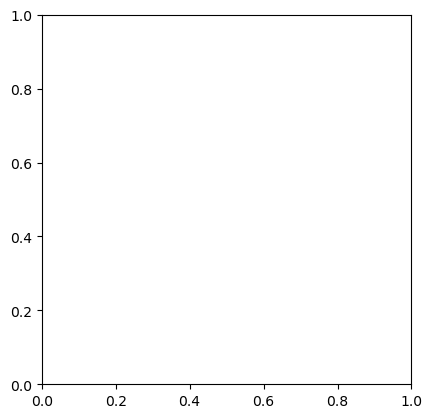

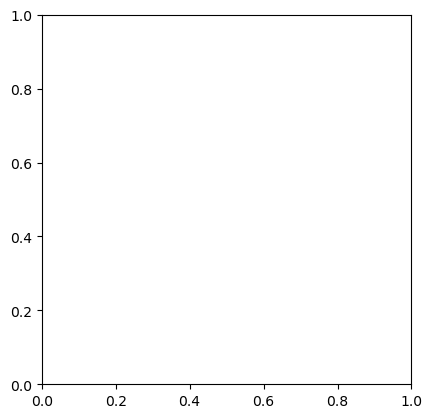

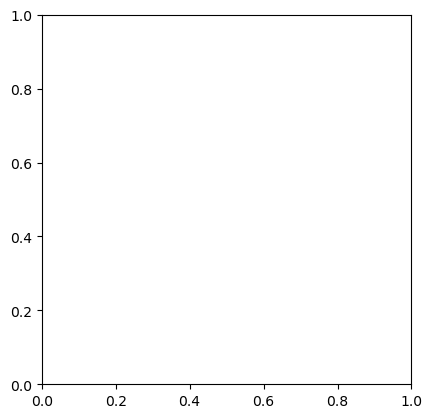

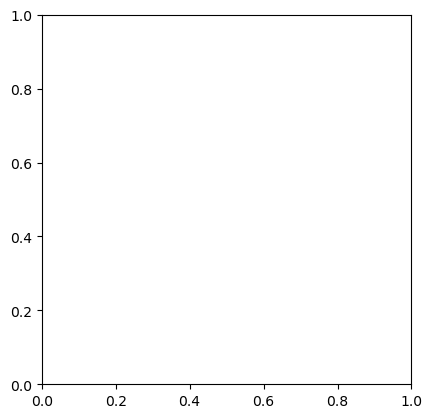

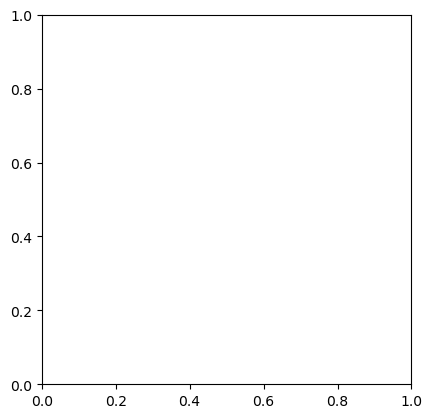

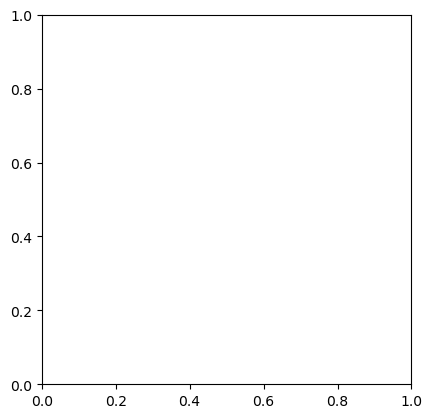

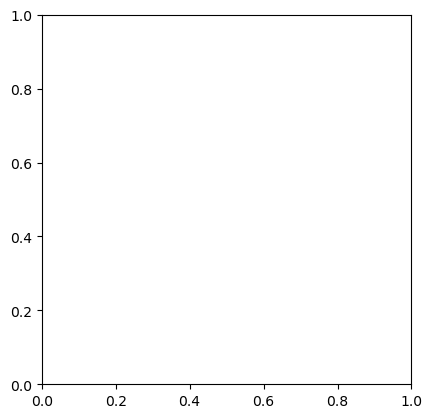

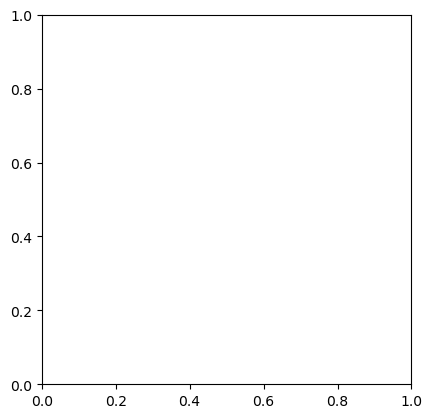

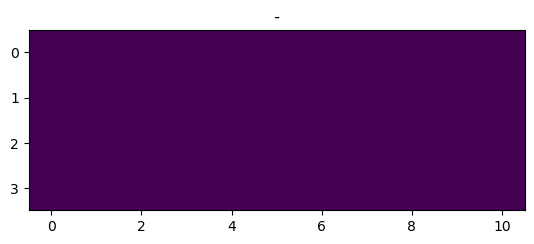

In [27]:
## распознавание образов
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label, regionprops
from pathlib import Path

__file__ = Path(r"C:\Users\Артем\Desktop\nb\vector_recognition")

image = plt.imread("./alphabet-small.png")

def extractor(region):
    area = region.area / region.image.size
    cy, cx = region.centroid_local
    cy /= region.image.shape[0]
    cx /= region.image.shape[1]
    perimeter = region.perimeter
    perimeter /= region.image.size
    eccentricity = region.eccentricity
    vlines = np.sum(region.image, 0) == region.image.shape[0]
    vlines = np.sum(vlines) / region.image.shape[1]
    x = region.image.mean(axis=0) == 1
    holes = count_holes(region)
    ratio = region.image.shape[1] / region.image.shape[0]
    return np.array([area, cy, cx, perimeter, eccentricity, vlines, holes, abs(cx - cy), ratio, cx < 0.44])

def count_holes(region):
    shape = region.image.shape
    new_image = np.zeros((shape[0] + 2, shape[1] + 2))
    new_image[1:-1, 1:-1] = region.image
    new_image = np.logical_not(new_image)
    labeled = label(new_image)
    return np.max(labeled) - 1

def norm_l1(v, v_):
    return ((v - v_) ** 2).sum() ** 0.5

def classificator(v, template):
    result = "_"
    min_dist = 10 ** 16
    for key in templates:
        d = norm_l1(v, templates[key])
        if d < min_dist:
            result = key
            min_dist = d
    return result
  
gray = image.mean(axis=2)
b = gray < 1
labeled = label(b)
regions = regionprops(labeled)
print(len(regions))

templates = {"A" : extractor(regions[2]), 
             "B" : extractor(regions[3]), 
             "8" : extractor(regions[0]), 
             "0" : extractor(regions[1]), 
             "1" : extractor(regions[4]), 
             "W" : extractor(regions[5]), 
             "X" : extractor(regions[6]), 
             "*" : extractor(regions[7]), 
             "-" : extractor(regions[9]), 
             "/" : extractor(regions[8])}

print(templates)

# for region in regions:
#     v = extractor(region)
#     print(classificator(v, templates))

# c = 1
# for i, region in enumerate(regions):
#     v = extractor(region)
#     plt.subplot(2, 5, c)
#     plt.title(classificator(v, templates))
#     c+=1;
#     plt.imshow(region.image)

symbols = plt.imread("./alphabet.png")[:, :, :-1]
gray = symbols.mean(axis=2)
b = gray > 0
labeled = label(b)
regions = regionprops(labeled)

out_path = Path(__file__) / "out"
out_path.mkdir(exist_ok=True)

for i, region in enumerate(regions):
    plt.cla()
    plt.figure()
    v = extractor(region)
    plt.title(classificator(v, templates))
    plt.imshow(region.image)
    plt.savefig(out_path / f"{i:03d}.png")
    
# plt.imshow(regions[1].image)
# plt.show()

# c = 1
# for symbol, region in zip(templates, regions):
#     plt.subplot(2, 5, c)
#     c+=1
#     plt.title(symbol)
#     plt.imshow(region.image)
    
# plt.imshow(labeled)
# plt.show()